In [8]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import missingno as msno
import seaborn as sns 
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score

In [9]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("fivethirtyeight")
# 이미지가 레이아웃 안으로 들어오도록 함
mpl.rcParams.update({"figure.constrained_layout.use": True})

In [10]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list if 'D2C' in font]
plt.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

In [11]:
DATASET_DIR = '/home/doeun/code/AI/ESTSOFT2024/workspace/dataset/'
load_dir = 'america_big_cities_health_inventory'
file_name = 'BigCitiesHealth.csv'
RSLT_DIR = '/home/doeun/code/AI/ESTSOFT2024/workspace/1.project1_structured/BCHI/processed/'
pvtb_dir = RSLT_DIR + 'pvtb/'

In [12]:
file_path = os.path.join(DATASET_DIR,load_dir,file_name)
df = pd.read_csv(file_path)

df.info()

/tmp/ipykernel_304853/4197090996.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189979 entries, 0 to 189978
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                189979 non-null  object 
 1   metric_cat_label                 189979 non-null  object 
 2   metric_subcat_label              189979 non-null  object 
 3   metric_item_label_subtitle       189979 non-null  object 
 4   metric_cat_item_yaxis_label      189979 non-null  object 
 5   metric_source_desc_label_fn      189979 non-null  object 
 6   metric_source_desc_label_url_fn  189979 non-null  object 
 7   geo_label_city                   189979 non-null  object 
 8   geo_label_state                  188667 non-null  object 
 9   geo_label_citystate              189979 non-null  object 
 10  geo_fips_code                    188667 non-null  float64
 11  value                            189979 non-null  float64
 12  da

In [13]:
df["metric_label"] = df["metric_subcat_label"]+' | '+df["metric_item_label"] 

In [14]:
df["metric_label"].value_counts()

metric_label
Deaths | Premature Death                                  6825
Deaths | Injury Deaths                                    6405
Deaths | Deaths from All Causes                           6244
Cancer | All Cancer Deaths                                6233
Cardiovascular Disease | Cardiovascular Disease Deaths    6195
                                                          ... 
Housing | Homeless, Total                                  266
Housing | Vacant Housing and Homelessness                  266
Housing | Homeless, Children                               256
Respiratory Infection | COVID-19 Vaccination, Adults        70
Respiratory Infection | COVID-19 Vaccination, Seniors       70
Name: count, Length: 118, dtype: int64

In [15]:
# 'date_label'그룹으로  'metric_item_label' 재구성
grouped_data = df.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)

grouped_data.head()


metric_item_label  Adult Binge Drinking  Adult Mental Distress  Adult Obesity  \
date_label                                                                      
2010                                 36                     36             36   
2011                                 36                     36             36   
2012                                 36                     36             36   
2013                                 36                     36             36   
2014                                 36                     36             36   

metric_item_label  Adult Physical Inactivity  Adult Smoking  \
date_label                                                    
2010                                      36             36   
2011                                      36             36   
2012                                      36             36   
2013                                      36             36   
2014                                      36             36   

metric_item_label  All Cancer Deaths  Breast Cancer Deaths  COVID-19 Deaths  \
date_label                                                                    
2010                             448                   128                0   
2011                             464                   134                0   
2012                             468                   135                0   
2013                             472                   134                0   
2014                             478                   135                0   

metric_item_label  COVID-19 Vaccination, Adults  \
date_label                                        
2010                                          0   
2011                                          0   
2012                                          0   
2013                                          0   
2014                                          0   

metric_item_label  COVID-19 Vaccination, Seniors  ...  Teen Suicidal Ideation  \
date_label                                        ...                           
2010                                           0  ...                      18   
2011                                           0  ...                      74   
2012                                           0  ...                      18   
2013                                           0  ...                      84   
2014                                           0  ...                      18   

metric_item_label  Teen TV Time  Unemployment  Uninsured, All Ages  \
date_label                                                           
2010                         20           211                    0   
2011                         81           211                    0   
2012                         20           211                    0   
2013                         92           211                  211   
2014                         20           211                  211   

metric_item_label  Uninsured, Child  Vacant Housing Units  \
date_label                                                  
2010                              0                    36   
2011                              0                    36   
2012                              0                    36   
2013                            211                    36   
2014                            211                    36   

metric_item_label  Vacant Housing and Homelessness  Violent Crime  \
date_label                                                          
2010                                             0             36   
2011                                             0             36   
2012                                             0             36   
2013                                             0             36   
2014                                             0             35   

metric_item_label  Walking to Work  Weapons in School  
date_label                                         

In [16]:
# date_label별로 정렬
df_sorted = df.sort_values(by='date_label')

# 각 연도별로 metric_item_label의 개수를 세분화하여 계산
detailed_counts_per_year = df_sorted.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)

# 결과 확인
detailed_counts_per_year.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환
print(detailed_counts_per_year)

metric_item_label  date_label  Adult Binge Drinking  Adult Mental Distress  \
0                        2010                    36                     36   
1                        2011                    36                     36   
2                        2012                    36                     36   
3                        2013                    36                     36   
4                        2014                    36                     36   
5                        2015                    36                     36   
6                        2016                    36                     36   
7                        2017                    36                     36   
8                        2018                    36                     36   
9                        2019                    36                     36   
10                       2020                    36                     36   
11                       2021                    36             

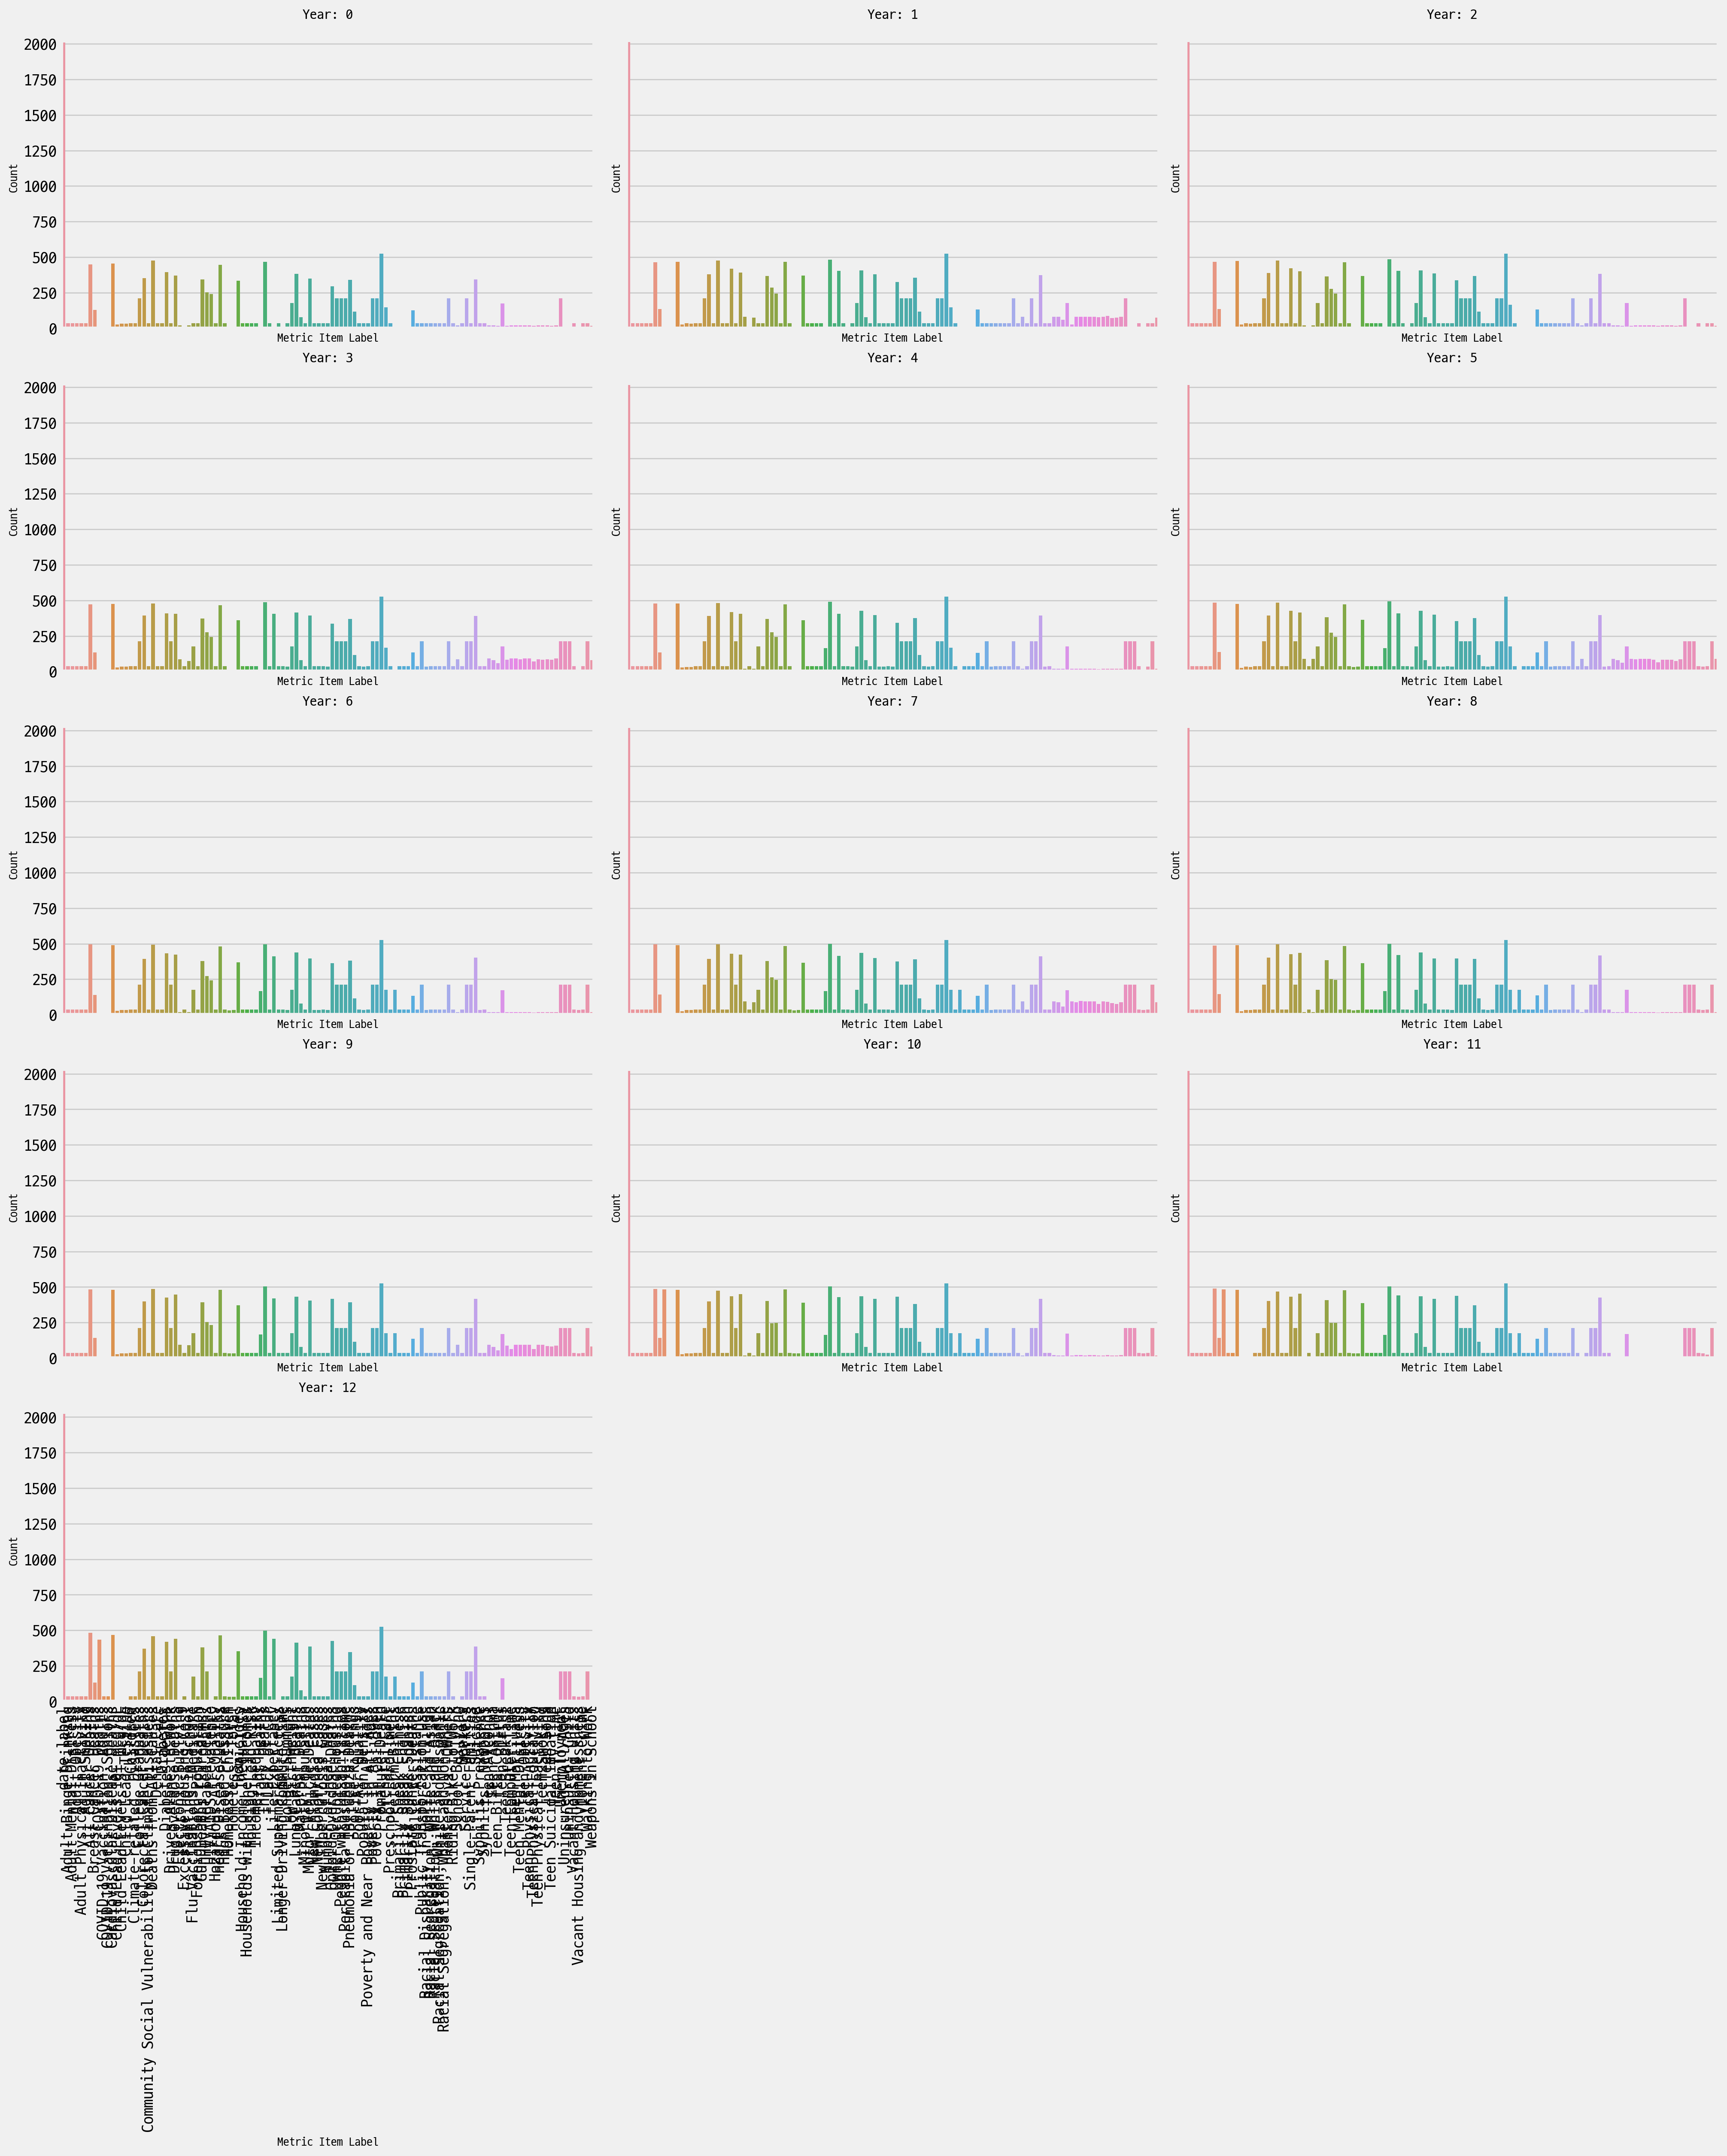

In [17]:
# 시각화
num_years = len(detailed_counts_per_year)
cols = 3
rows = (num_years // cols) + (num_years % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), sharex=True, sharey=True)
axes = axes.flatten()

for i, year in enumerate(detailed_counts_per_year.index):
    ax = axes[i]
    sns.barplot(x=detailed_counts_per_year.columns, y=detailed_counts_per_year.loc[year], ax=ax)
    ax.set_title(f'Year: {year}', fontsize=12)
    ax.set_xlabel('Metric Item Label', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_xticklabels(detailed_counts_per_year.columns, rotation=90)

# 빈 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
# 필요한 컬럼만 선택
selected_columns = ['metric_item_label', 'metric_subcat_label','metric_source_desc_label_fn', 'geo_label_city', 'date_label', 'value_95_ci_low', 'value_95_ci_high']
df_selected = df[selected_columns]

# date_label별로 정렬
df_sorted = df_selected.sort_values(by='date_label')

# date_label을 기준으로 각 항목을 분류
grouped_data = df_sorted.groupby('date_label').apply(lambda x: x.reset_index(drop=True))

# 결과 확인
print(grouped_data.head(20))  # 상위 20개 행만 출력하여 확인

                                    metric_item_label  \
date_label                                              
2010       0   Racial Segregation, White and Hispanic   
           1                   Deaths from All Causes   
           2                   Deaths from All Causes   
           3              Child Lead Levels 5+ mcg/dL   
           4              Child Lead Levels 5+ mcg/dL   
           5              Child Lead Levels 5+ mcg/dL   
           6               Climate-related  Disasters   
           7               Climate-related  Disasters   
           8               Climate-related  Disasters   
           9               Climate-related  Disasters   
           10              Climate-related  Disasters   
           11              Climate-related  Disasters   
           12              Climate-related  Disasters   
           13              Climate-related  Disasters   
           14              Climate-related  Disasters   
           15              Clim

In [19]:
# date_label별로 정렬
df_sorted = df.sort_values(by='date_label')

# 각 연도별로 metric_item_label의 개수를 세분화하여 계산
metric_item_label_counts = df_sorted.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)
metric_item_label_counts.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환

# 각 연도별로 metric_subcat_label의 개수를 세분화하여 계산
metric_subcat_label_counts = df_sorted.groupby(['date_label', 'metric_subcat_label']).size().unstack(fill_value=0)
metric_subcat_label_counts.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환

# 각 연도별로 geo_label_city의 개수를 세분화하여 계산
geo_label_city_counts = df_sorted.groupby(['date_label', 'geo_label_city']).size().unstack(fill_value=0)
geo_label_city_counts.reset_index(inplace=True)  # 인덱스를 초기화하여 보기 쉽게 변환

# 결과 확인
print("Metric Item Label Counts:\n", metric_item_label_counts.head())
print("Metric Subcat Label Counts:\n", metric_subcat_label_counts.head())
print("Geo Label City Counts:\n", geo_label_city_counts.head())

Metric Item Label Counts:
 metric_item_label  date_label  Adult Binge Drinking  Adult Mental Distress  \
0                        2010                    36                     36   
1                        2011                    36                     36   
2                        2012                    36                     36   
3                        2013                    36                     36   
4                        2014                    36                     36   

metric_item_label  Adult Obesity  Adult Physical Inactivity  Adult Smoking  \
0                             36                         36             36   
1                             36                         36             36   
2                             36                         36             36   
3                             36                         36             36   
4                             36                         36             36   

metric_item_label  All Cancer Death

/tmp/ipykernel_304853/608314759.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/home/doeun/anaconda3/envs/EST_NA/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


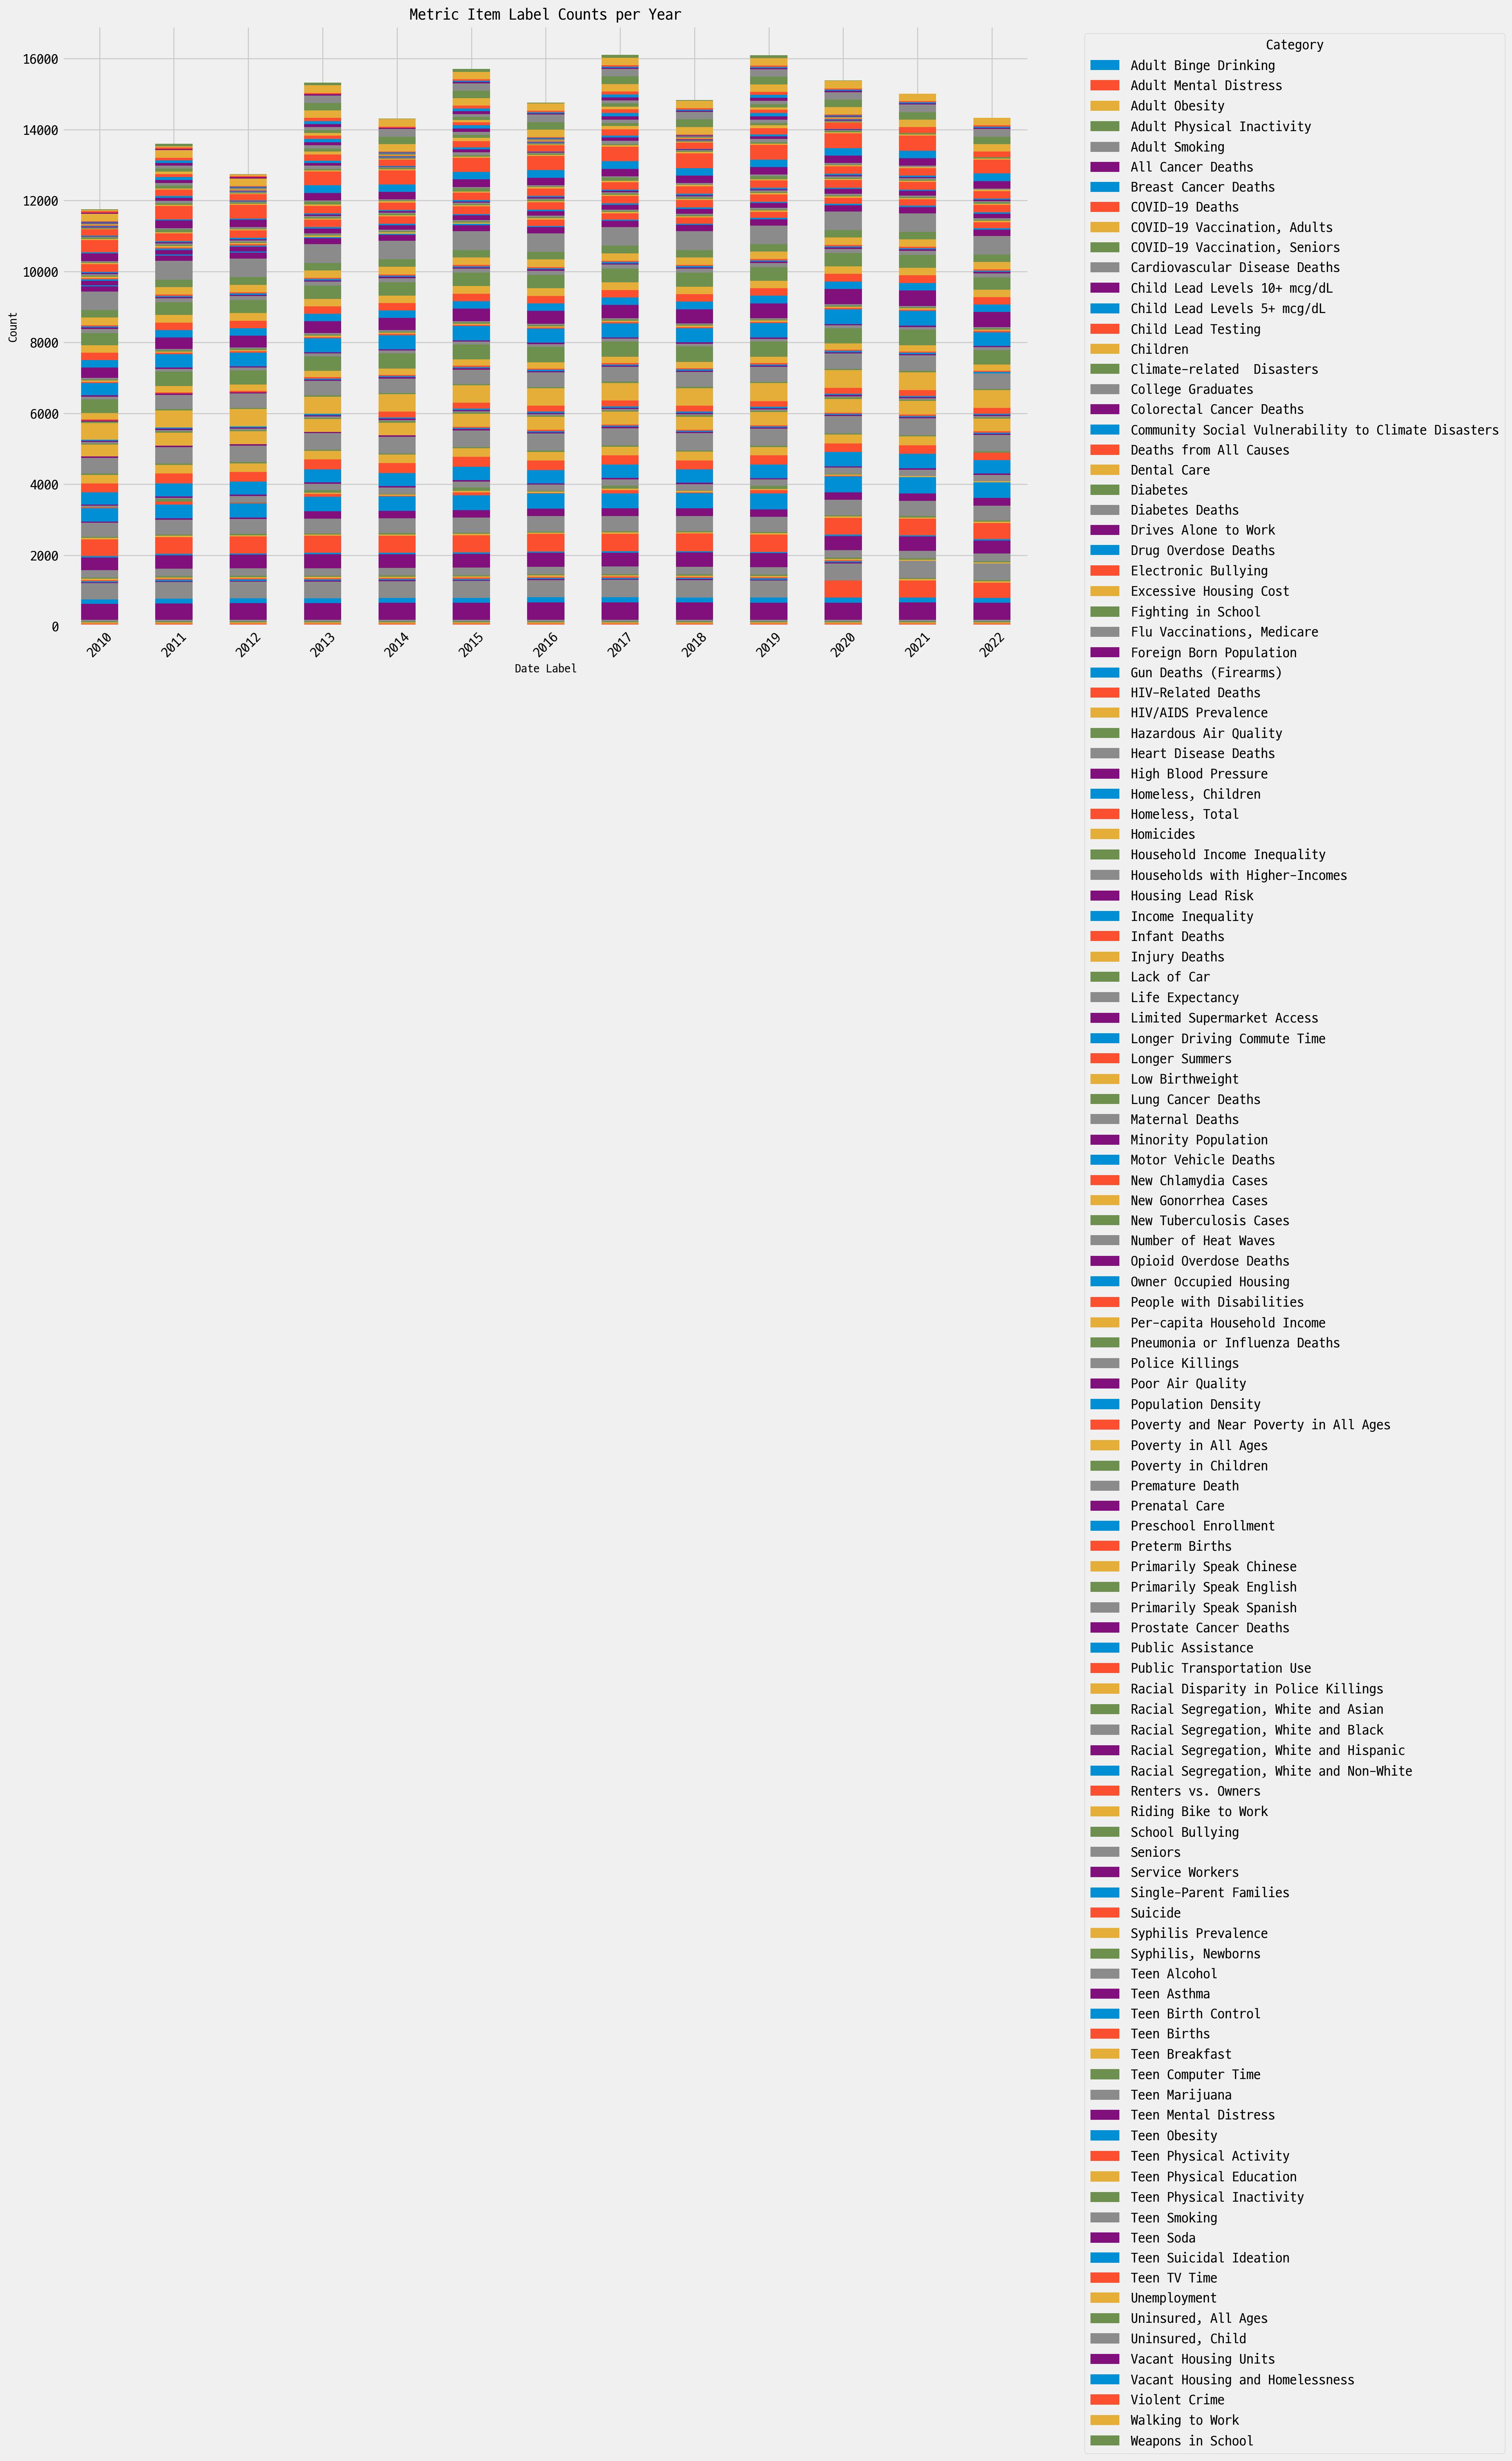

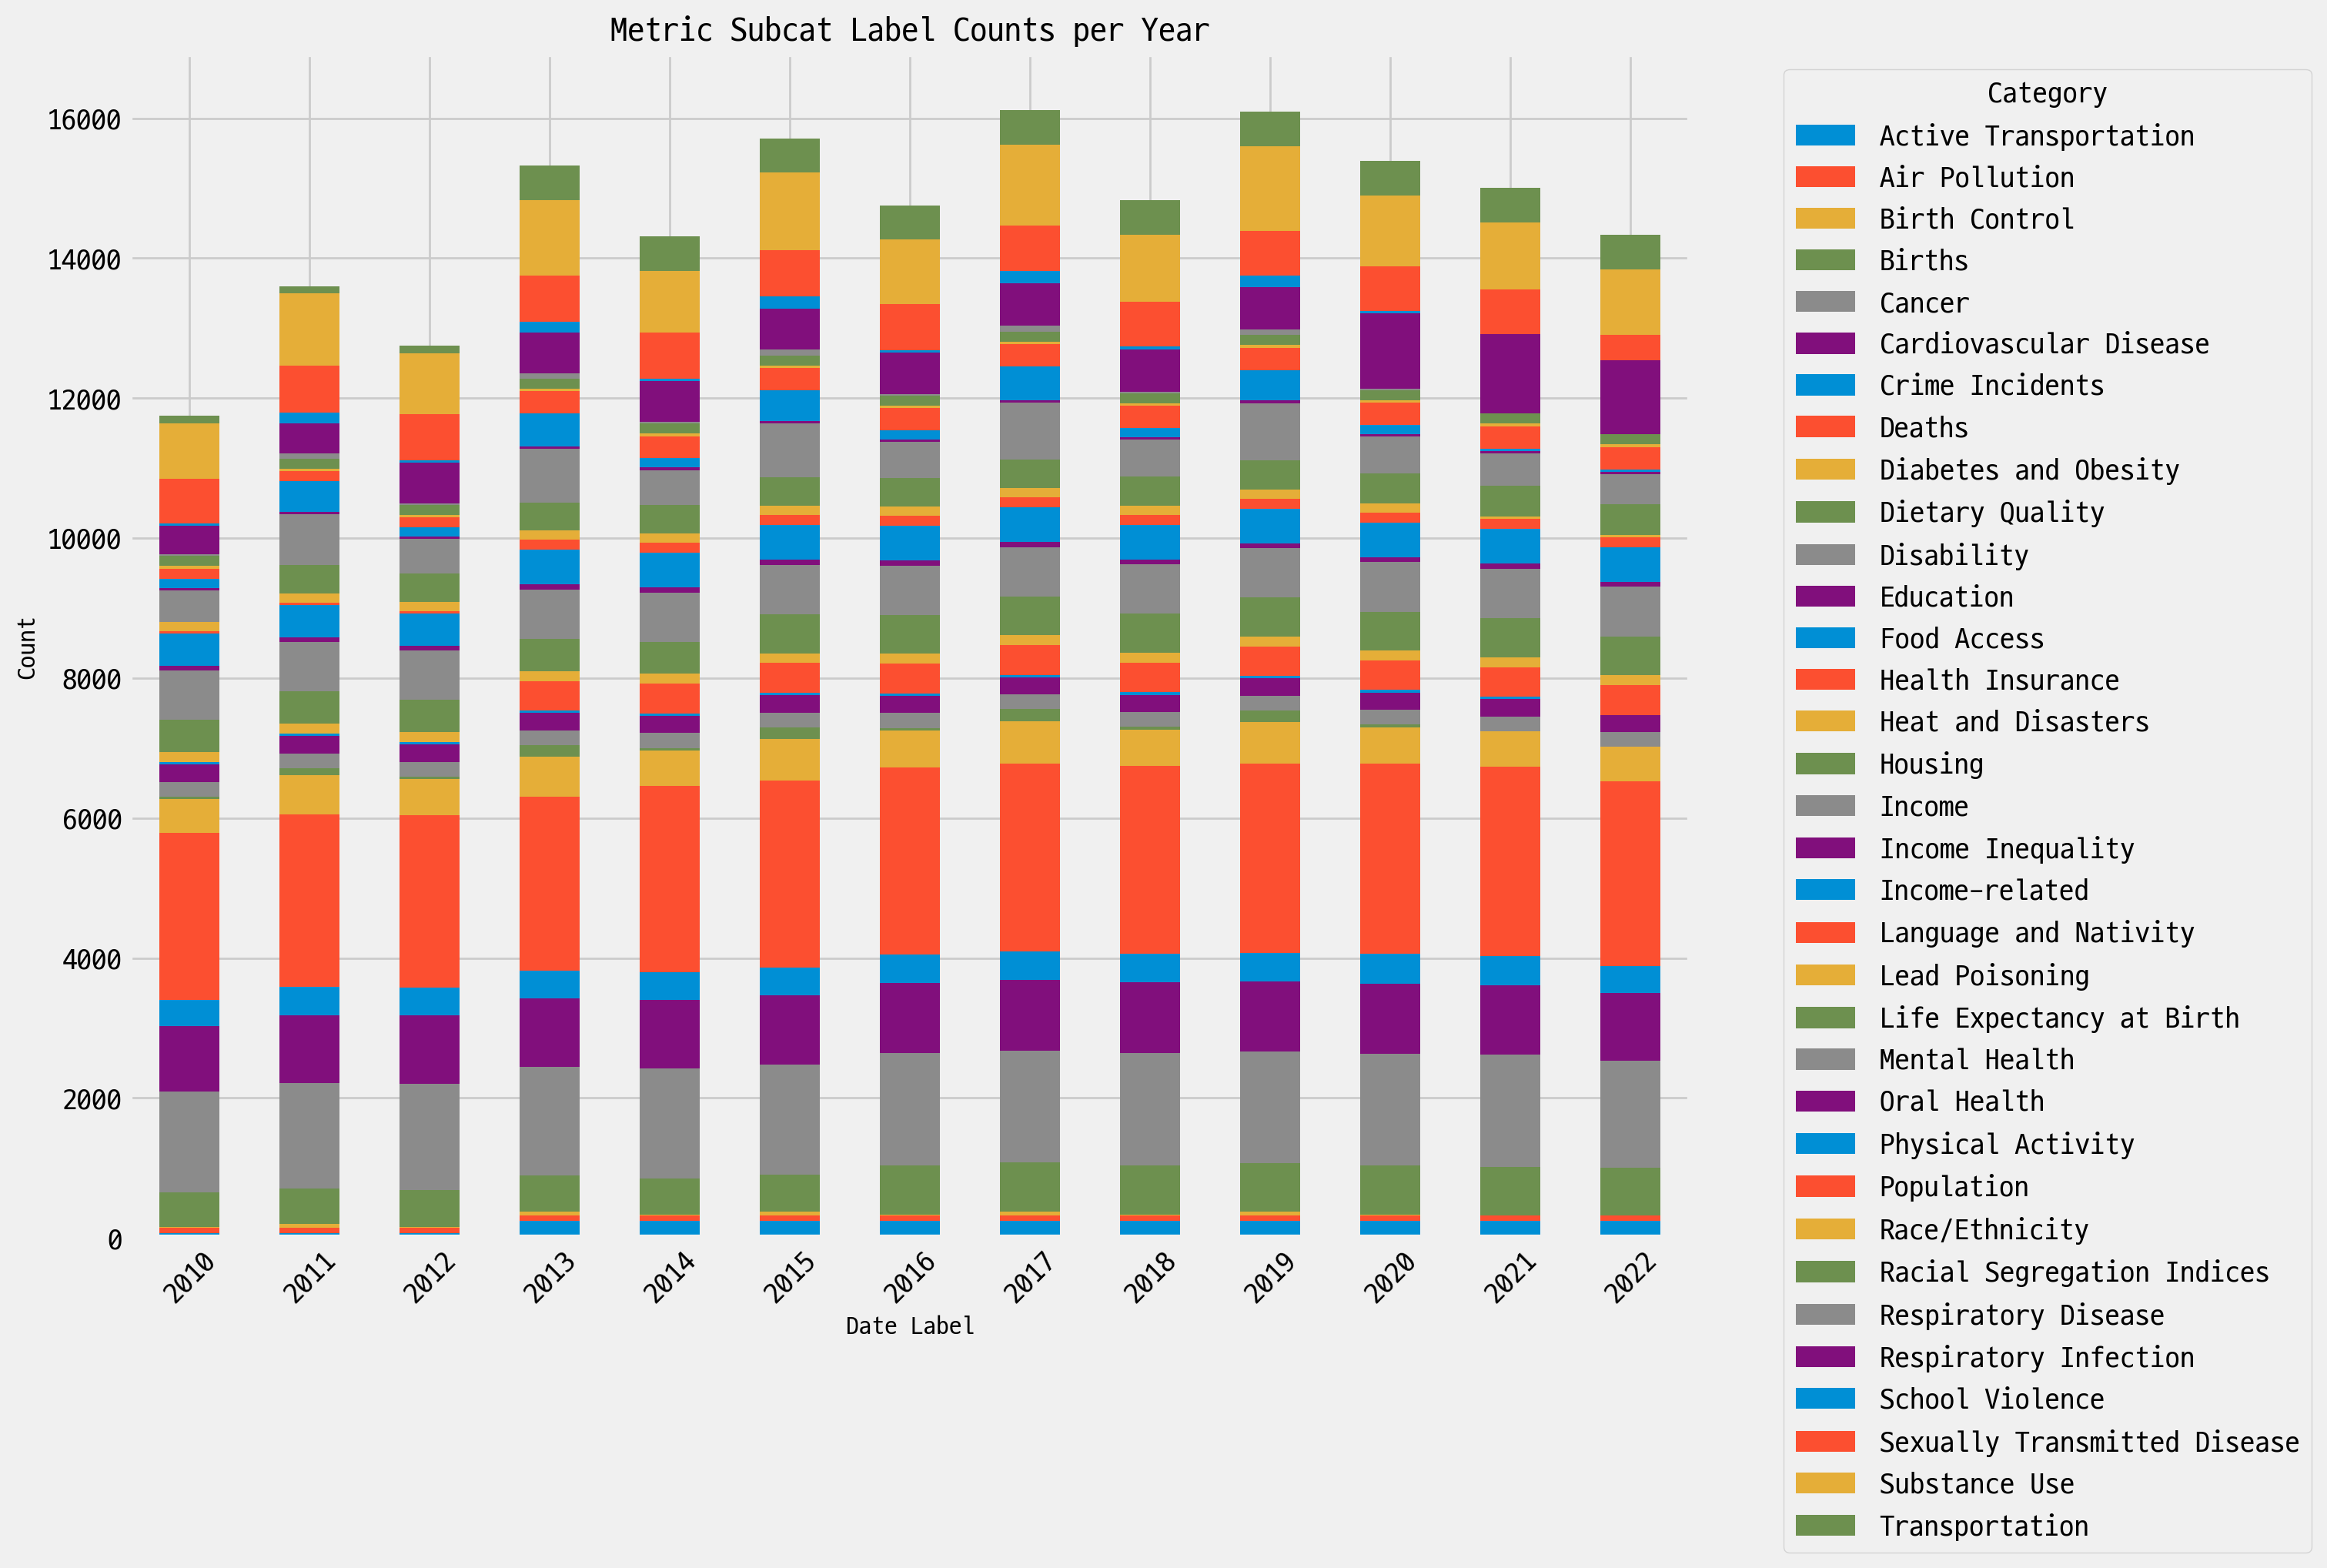

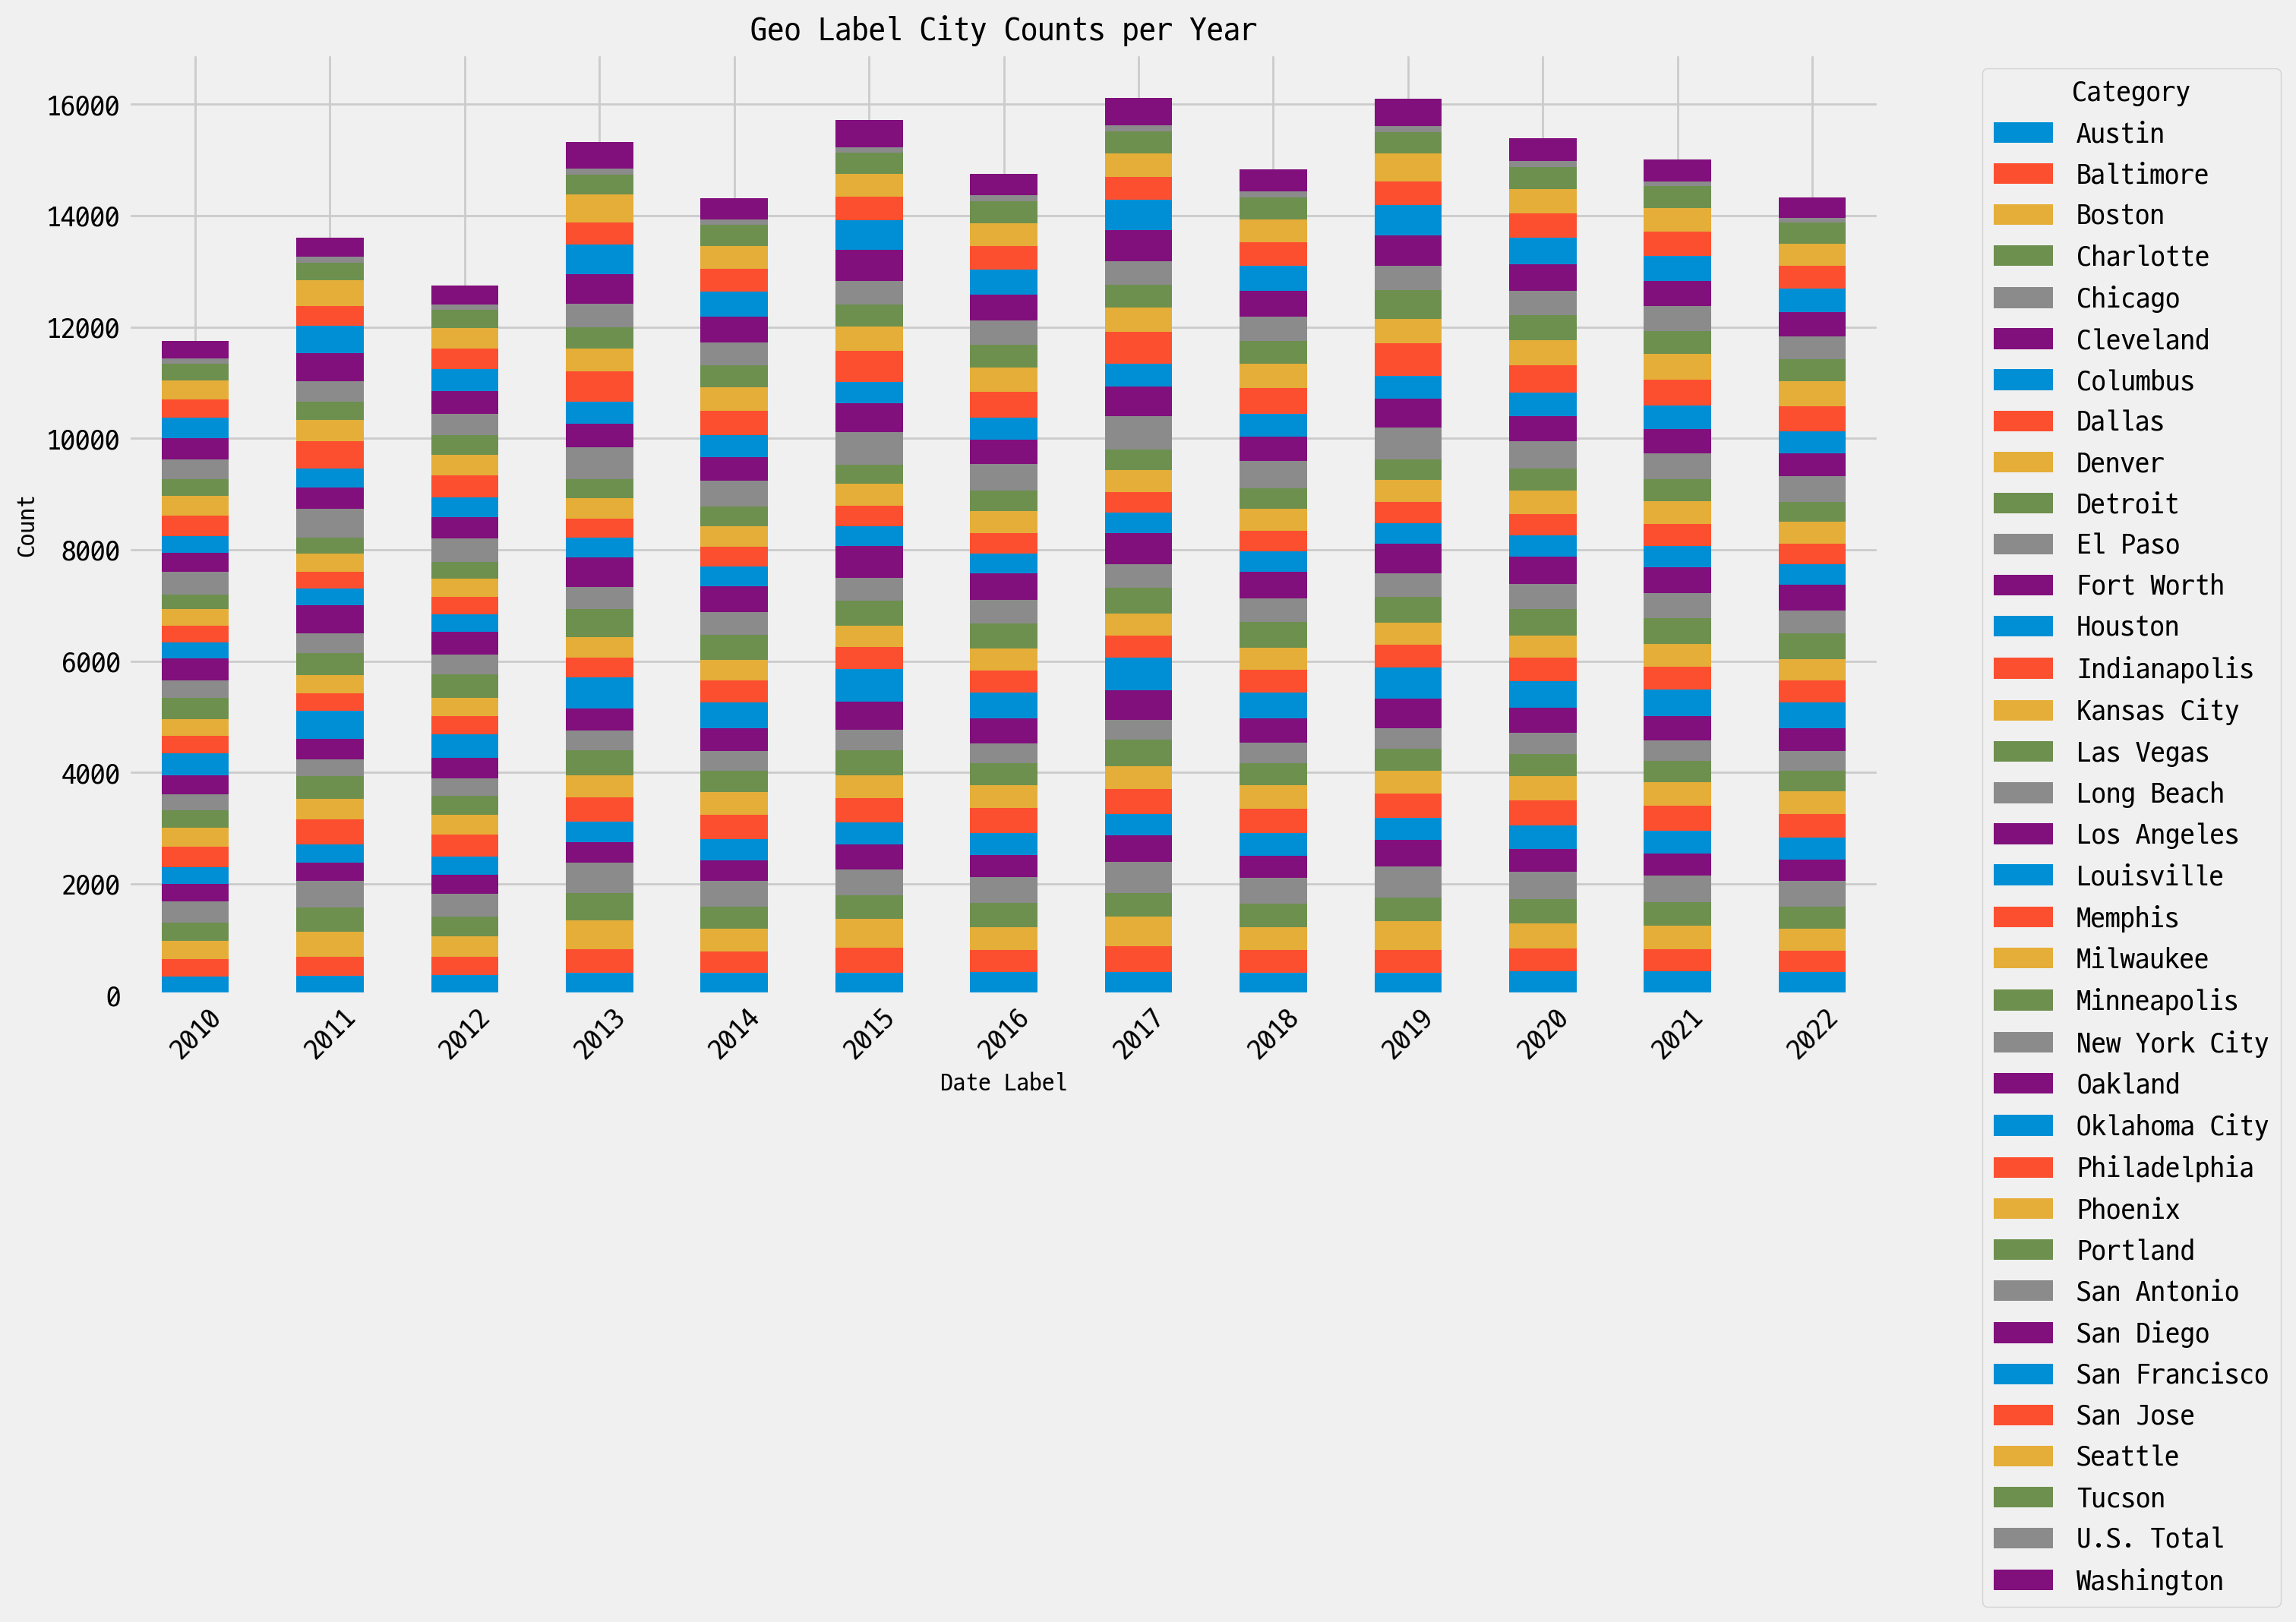

In [20]:
# 시각화를 위한 함수 정의
def plot_bar(data, title, xlabel, ylabel):
    data.set_index('date_label', inplace=True)
    ax = data.plot(kind='bar', stacked=True, figsize=(15, 10))
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 시각화 실행
plot_bar(metric_item_label_counts, 'Metric Item Label Counts per Year', 'Date Label', 'Count')
plot_bar(metric_subcat_label_counts, 'Metric Subcat Label Counts per Year', 'Date Label', 'Count')
plot_bar(geo_label_city_counts, 'Geo Label City Counts per Year', 'Date Label', 'Count')

/tmp/ipykernel_304853/201074599.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/home/doeun/anaconda3/envs/EST_NA/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


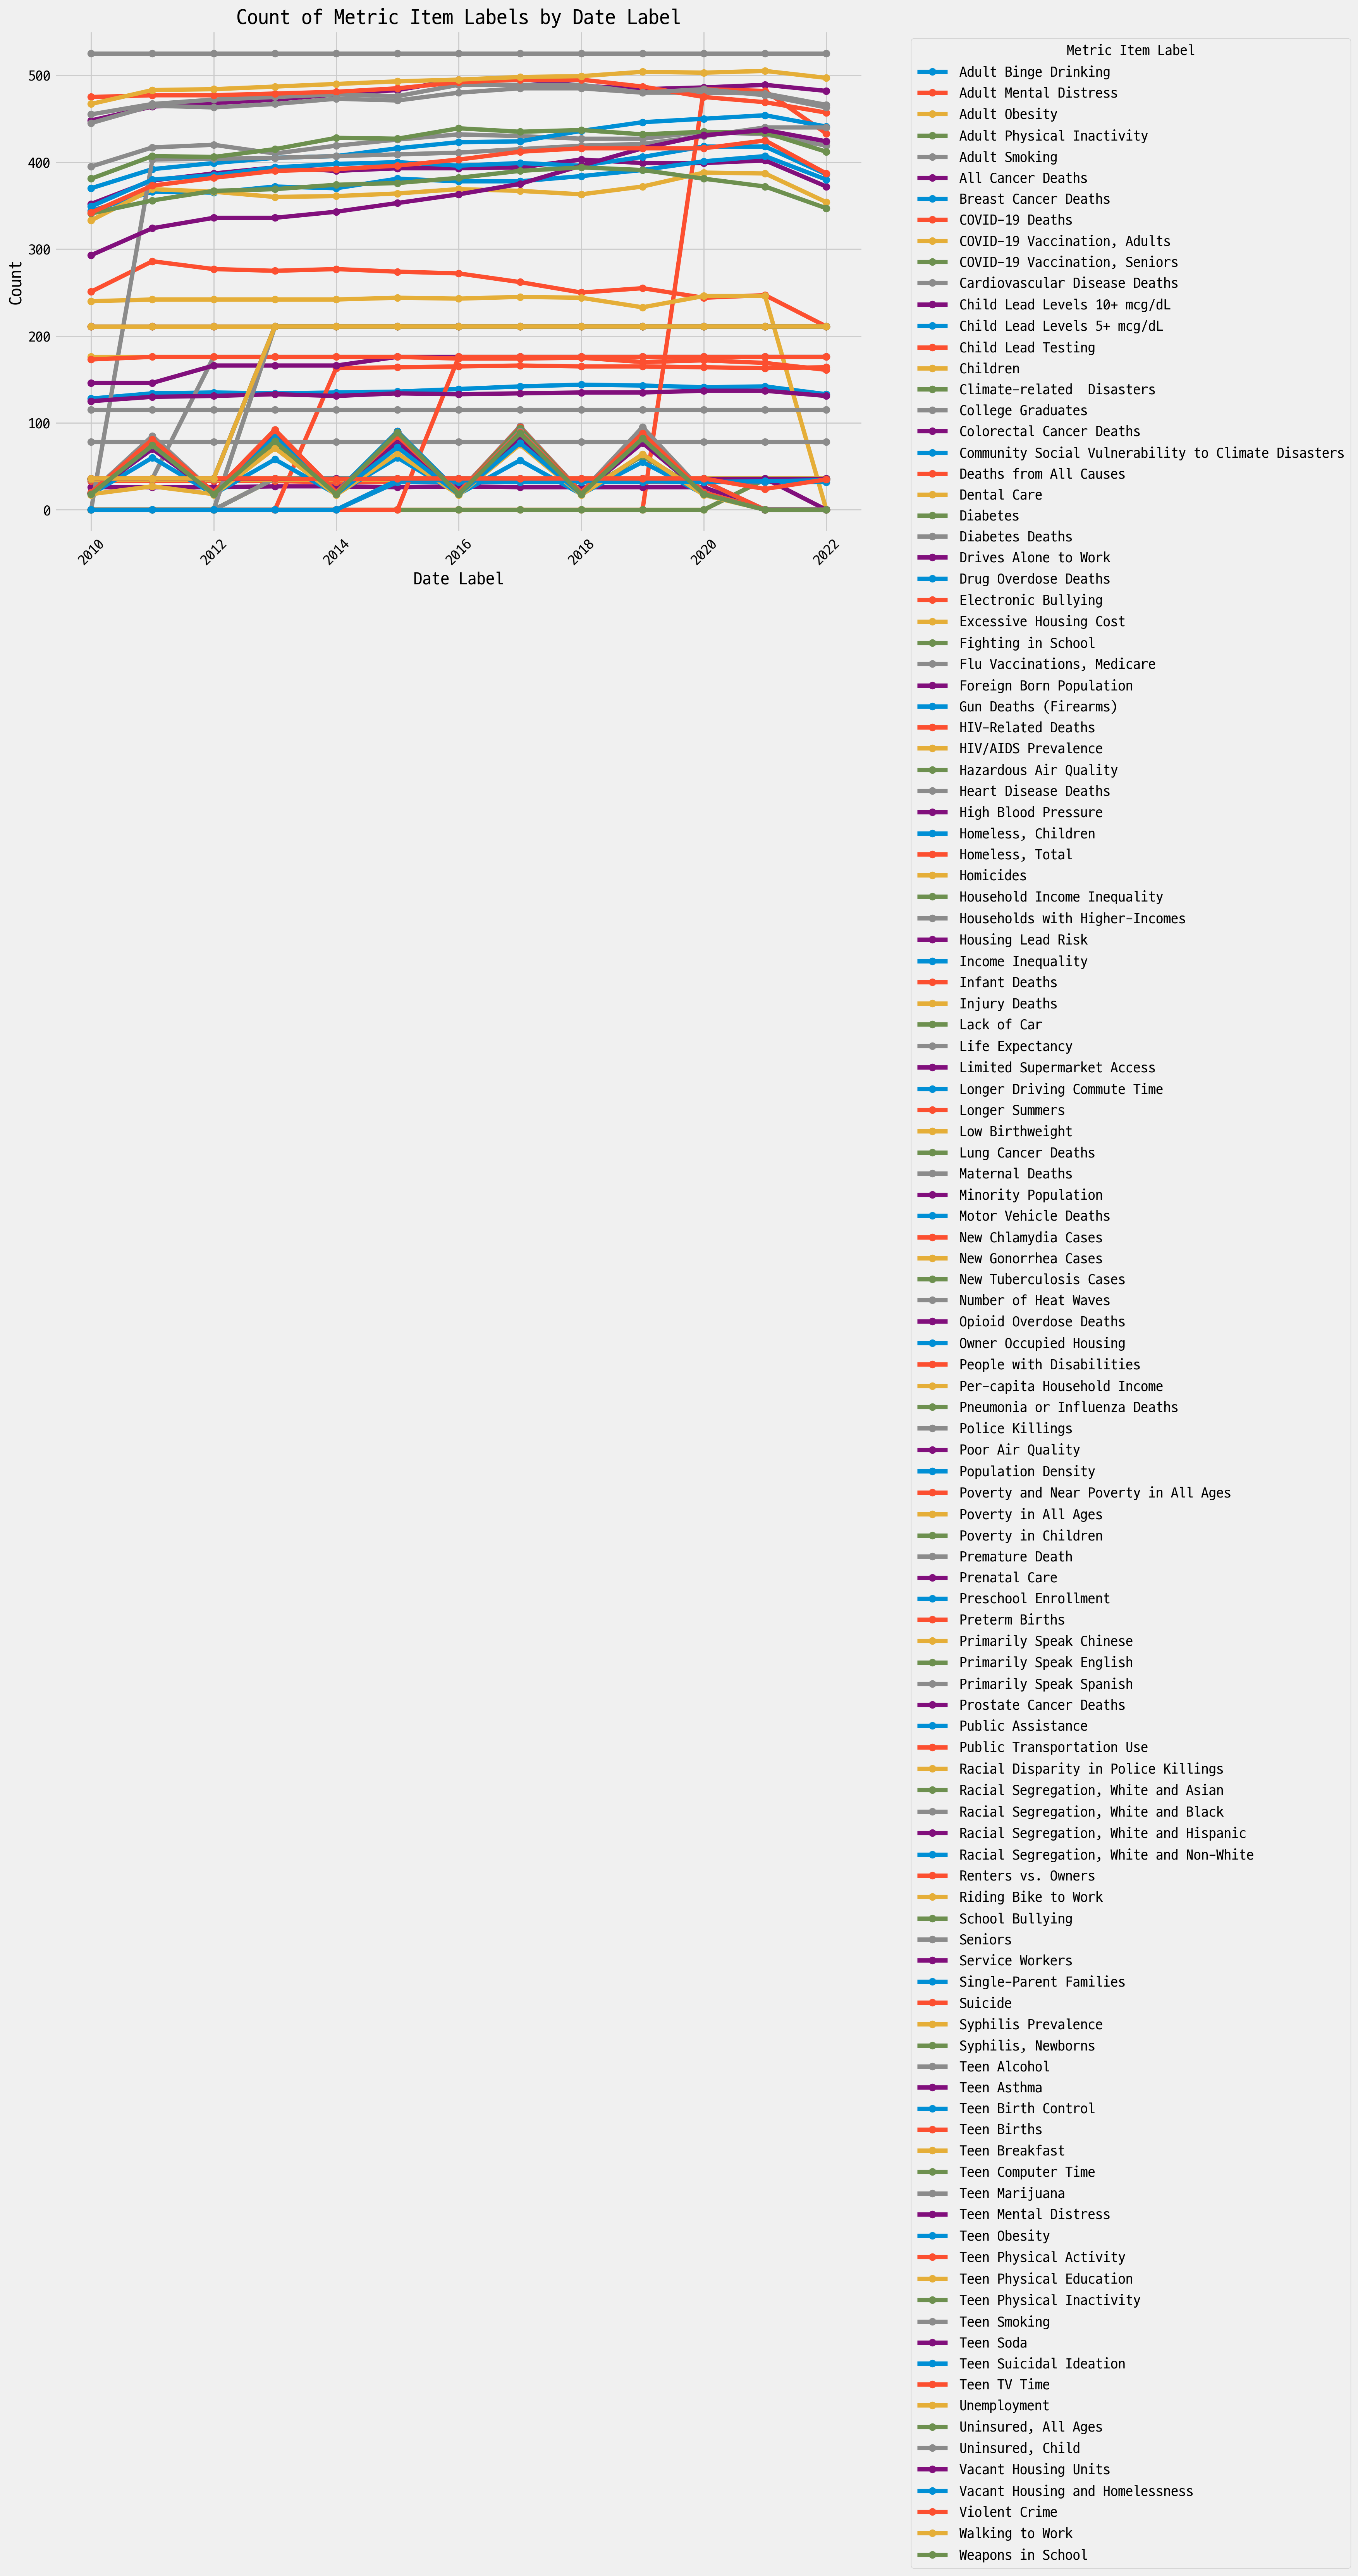

In [24]:
# 필요한 컬럼만 선택
selected_columns = ['metric_item_label', 'metric_subcat_label', 'geo_label_city', 'date_label']
df_selected = df[selected_columns]

# date_label별로 정렬
df_sorted = df_selected.sort_values(by='date_label')

# 각 연도별로 metric_item_label의 개수를 세분화하여 계산
metric_item_label_counts = df_sorted.groupby(['date_label', 'metric_item_label']).size().unstack(fill_value=0)
metric_item_label_counts.reset_index(inplace=True)

# 시각화
plt.figure(figsize=(12, 8))
for metric in metric_item_label_counts.columns[1:]:
    plt.plot(metric_item_label_counts['date_label'], metric_item_label_counts[metric], marker='o', label=metric)

plt.xlabel('Date Label')
plt.ylabel('Count')
plt.title('Count of Metric Item Labels by Date Label')
plt.legend(title='Metric Item Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# 필요한 컬럼만 선택
selected_columns = ['metric_item_label', 'metric_subcat_label', 'geo_label_city', 'date_label']
df_selected = df[selected_columns]

# 결측값 처리 (결측값을 -1로 채움)
df_selected.fillna(-1, inplace=True)

# 카테고리형 변수 인코딩
label_encoders = {}
for column in ['metric_item_label', 'metric_subcat_label', 'geo_label_city']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# X와 Y 분리
X = df_selected.drop('date_label', axis=1)
y = df_selected['date_label']

# Y 라벨 인코딩
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# 학습용과 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# 예측값과 실제값 비교
comparison_df = pd.DataFrame({'Actual': y_le.inverse_transform(y_test), 'Predicted': y_le.inverse_transform(np.round(y_pred).astype(int))})
print(comparison_df.head())

/tmp/ipykernel_304853/3872611321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(-1, inplace=True)
/tmp/ipykernel_304853/3872611321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_304853/3872611321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

Mean Squared Error: 13.23303720562271
R^2 Score: 0.0002866761753046454
   Actual  Predicted
0    2022       2016
1    2018       2016
2    2017       2016
3    2017       2016
4    2011       2016


In [26]:
# 'metric_cat_item_yaxis_label' 컬럼을 기준으로 데이터를 정렬
sorted_data_by_metric = df.sort_values(by='metric_cat_item_yaxis_label')

# 첫 10개의 데이터를 확인
sorted_data_by_metric.head(10)

metric_item_label     metric_cat_label  \
113909  HIV/AIDS Prevalence  Infectious Diseases   
114528  HIV/AIDS Prevalence  Infectious Diseases   
114529  HIV/AIDS Prevalence  Infectious Diseases   
114530  HIV/AIDS Prevalence  Infectious Diseases   
114531  HIV/AIDS Prevalence  Infectious Diseases   
114532  HIV/AIDS Prevalence  Infectious Diseases   
114533  HIV/AIDS Prevalence  Infectious Diseases   
114527  HIV/AIDS Prevalence  Infectious Diseases   
114534  HIV/AIDS Prevalence  Infectious Diseases   
114536  HIV/AIDS Prevalence  Infectious Diseases   

                 metric_subcat_label  \
113909  Sexually Transmitted Disease   
114528  Sexually Transmitted Disease   
114529  Sexually Transmitted Disease   
114530  Sexually Transmitted Disease   
114531  Sexually Transmitted Disease   
114532  Sexually Transmitted Disease   
114533  Sexually Transmitted Disease   
114527  Sexually Transmitted Disease   
114534  Sexually Transmitted Disease   
114536  Sexually Transmitted Disease   

                               metric_item_label_subtitle  \
113909  Persons living with HIV/AIDS (per 100,000 popu...   
114528  Persons living with HIV/AIDS (per 100,000 popu...   
114529  Persons living with HIV/AIDS (per 100,000 popu...   
114530  Persons living with HIV/AIDS (per 100,000 popu...   
114531  Persons living with HIV/AIDS (per 100,000 popu...   
114532  Persons living with HIV/AIDS (per 100,000 popu...   
114533  Persons living with HIV/AIDS (per 100,000 popu...   
114527  Persons living with HIV/AIDS (per 100,000 popu...   
114534  Persons living with HIV/AIDS (per 100,000 popu...   
114536  Persons living with HIV/AIDS (per 100,000 popu...   

       metric_cat_item_yaxis_label  \
113909           Cases per 100,000   
114528           Cases per 100,000   
114529           Cases per 100,000   
114530           Cases per 100,000   
114531           Cases per 100,000   
114532           Cases per 100,000   
114533           Cases per 100,000   
114527           Cases per 100,000   
114534           Cases per 100,000   
114536           Cases per 100,000   

                              metric_source_desc_label_fn  \
113909  National Center for HIV/AIDS, Viral Hepatitis,...   
114528  National Center for HIV/AIDS, Viral Hepatitis,...   
114529  National Center for HIV/AIDS, Viral Hepatitis,...   
114530  National Center for HIV/AIDS, Viral Hepatitis,...   
114531  National Center for HIV/AIDS, Viral Hepatitis,...   
114532  National Center for HIV/AIDS, Viral Hepatitis,...   
114533  National Center for HIV/AIDS, Viral Hepatitis,...   
114527  National Center for HIV/AIDS, Viral Hepatitis,...   
114534  National Center for HIV/AIDS, Viral Hepatitis,...   
114536  National Center for HIV/AIDS, Viral Hepatitis,...   

                    metric_source_desc_label_url_fn geo_label_city  \
113909  https://www.cdc.gov/nchhstp/atlas/index.htm    Kansas City   
114528  https://www.cdc.gov/nchhstp/atlas/index.htm       San Jose   
114529  https://www.cdc.gov/nchhstp/atlas/index.htm         Tucson   
114530  https://www.cdc.gov/nchhstp/atlas/index.htm         Austin   
114531  https://www.cdc.gov/nchhstp/atlas/index.htm     Long Beach   
114532  https://www.cdc.gov/nchhstp/atlas/index.htm        Oakland   
114533  https://www.cdc.gov/nchhstp/atlas/index.htm        Oakland   
114527  https://www.cdc.gov/nchhstp/atlas/index.htm  San Francisco   
114534  https://www.cdc.gov/nchhstp/atlas/index.htm        Chicago   
114536  https://www.cdc.gov/nchhstp/atlas/index.htm        Houston   

       geo_label_state geo_label_citystate  ...  value_90_ci_high  \
113909              MO     Kansas City, MO  ...               NaN   
114528              CA        San Jose, CA  ...               NaN   
114529              AZ          Tucson, AZ  ...               NaN   
114530              TX          Austin, TX  ...               NaN   
114531              CA      Long Beach, CA  ...               NaN   
114532              CA         Oakland, CA  ... 

In [27]:
# 'metric_cat_item_yaxis_label' 컬럼을 기준으로 데이터를 정렬
sorted_data_by_metric = df.sort_values(by='metric_cat_item_yaxis_label')

# 정렬된 데이터를 'metric_cat_item_yaxis_label' 컬럼의 요소별로 그룹화
grouped_data_by_metric = sorted_data_by_metric.groupby('metric_cat_item_yaxis_label')

# 각 그룹의 데이터를 확인
for name, group in grouped_data_by_metric:
    print(f"Group: {name}")
    print(group.head(10))

Group: Cases per 100,000
          metric_item_label     metric_cat_label  \
113909  HIV/AIDS Prevalence  Infectious Diseases   
114528  HIV/AIDS Prevalence  Infectious Diseases   
114529  HIV/AIDS Prevalence  Infectious Diseases   
114530  HIV/AIDS Prevalence  Infectious Diseases   
114531  HIV/AIDS Prevalence  Infectious Diseases   
114532  HIV/AIDS Prevalence  Infectious Diseases   
114533  HIV/AIDS Prevalence  Infectious Diseases   
114527  HIV/AIDS Prevalence  Infectious Diseases   
114534  HIV/AIDS Prevalence  Infectious Diseases   
114536  HIV/AIDS Prevalence  Infectious Diseases   

                 metric_subcat_label  \
113909  Sexually Transmitted Disease   
114528  Sexually Transmitted Disease   
114529  Sexually Transmitted Disease   
114530  Sexually Transmitted Disease   
114531  Sexually Transmitted Disease   
114532  Sexually Transmitted Disease   
114533  Sexually Transmitted Disease   
114527  Sexually Transmitted Disease   
114534  Sexually Transmitted Disease   
11

### to do
    1. 1차정리 데이터 pivot table화하기
        - pvtb: row, col; 원래 있던것
    2. df: city, date, label, value, unit
    3. unit 기준 나누기
    4. pvtb변환

In [29]:
# 'metric_cat_item_yaxis_label' 컬럼을 기준으로 데이터를 정렬하고 그룹화합니다.
sorted_data_by_metric = df.sort_values(by='metric_cat_item_yaxis_label')
grouped_data_by_metric = sorted_data_by_metric.groupby('metric_cat_item_yaxis_label')

# 각 그룹의 분산도를 계산합니다.
variance_by_group = grouped_data_by_metric.var()

# 결과를 확인합니다.
print(variance_by_group)

TypeError: could not convert string to float: 'HIV/AIDS Prevalence'

In [30]:
# 데이터프레임의 컬럼 확인
columns = df.columns
columns

Index(['metric_item_label', 'metric_cat_label', 'metric_subcat_label',
       'metric_item_label_subtitle', 'metric_cat_item_yaxis_label',
       'metric_source_desc_label_fn', 'metric_source_desc_label_url_fn',
       'geo_label_city', 'geo_label_state', 'geo_label_citystate',
       'geo_fips_code', 'value', 'date_label', 'geo_label_proxy_or_real',
       'geo_label_proxy_footnote', 'geo_fips_desc', 'date_label_proxy_or_real',
       'date_label_proxy_footnote', 'value_ci_flag_yesno', 'value_95_ci_low',
       'value_95_ci_high', 'value_90_ci_low', 'value_90_ci_high',
       'geo_strata_region', 'geo_strata_poverty', 'geo_strata_Population',
       'geo_strata_PopDensity', 'geo_strata_Segregation', 'strata_race_label',
       'strata_sex_label', 'strata_race_sex_label', 'metric_label'],
      dtype='object')

In [ ]:
## x축을 metric_item_label로, 너무 많으니까 좀 줄여서.

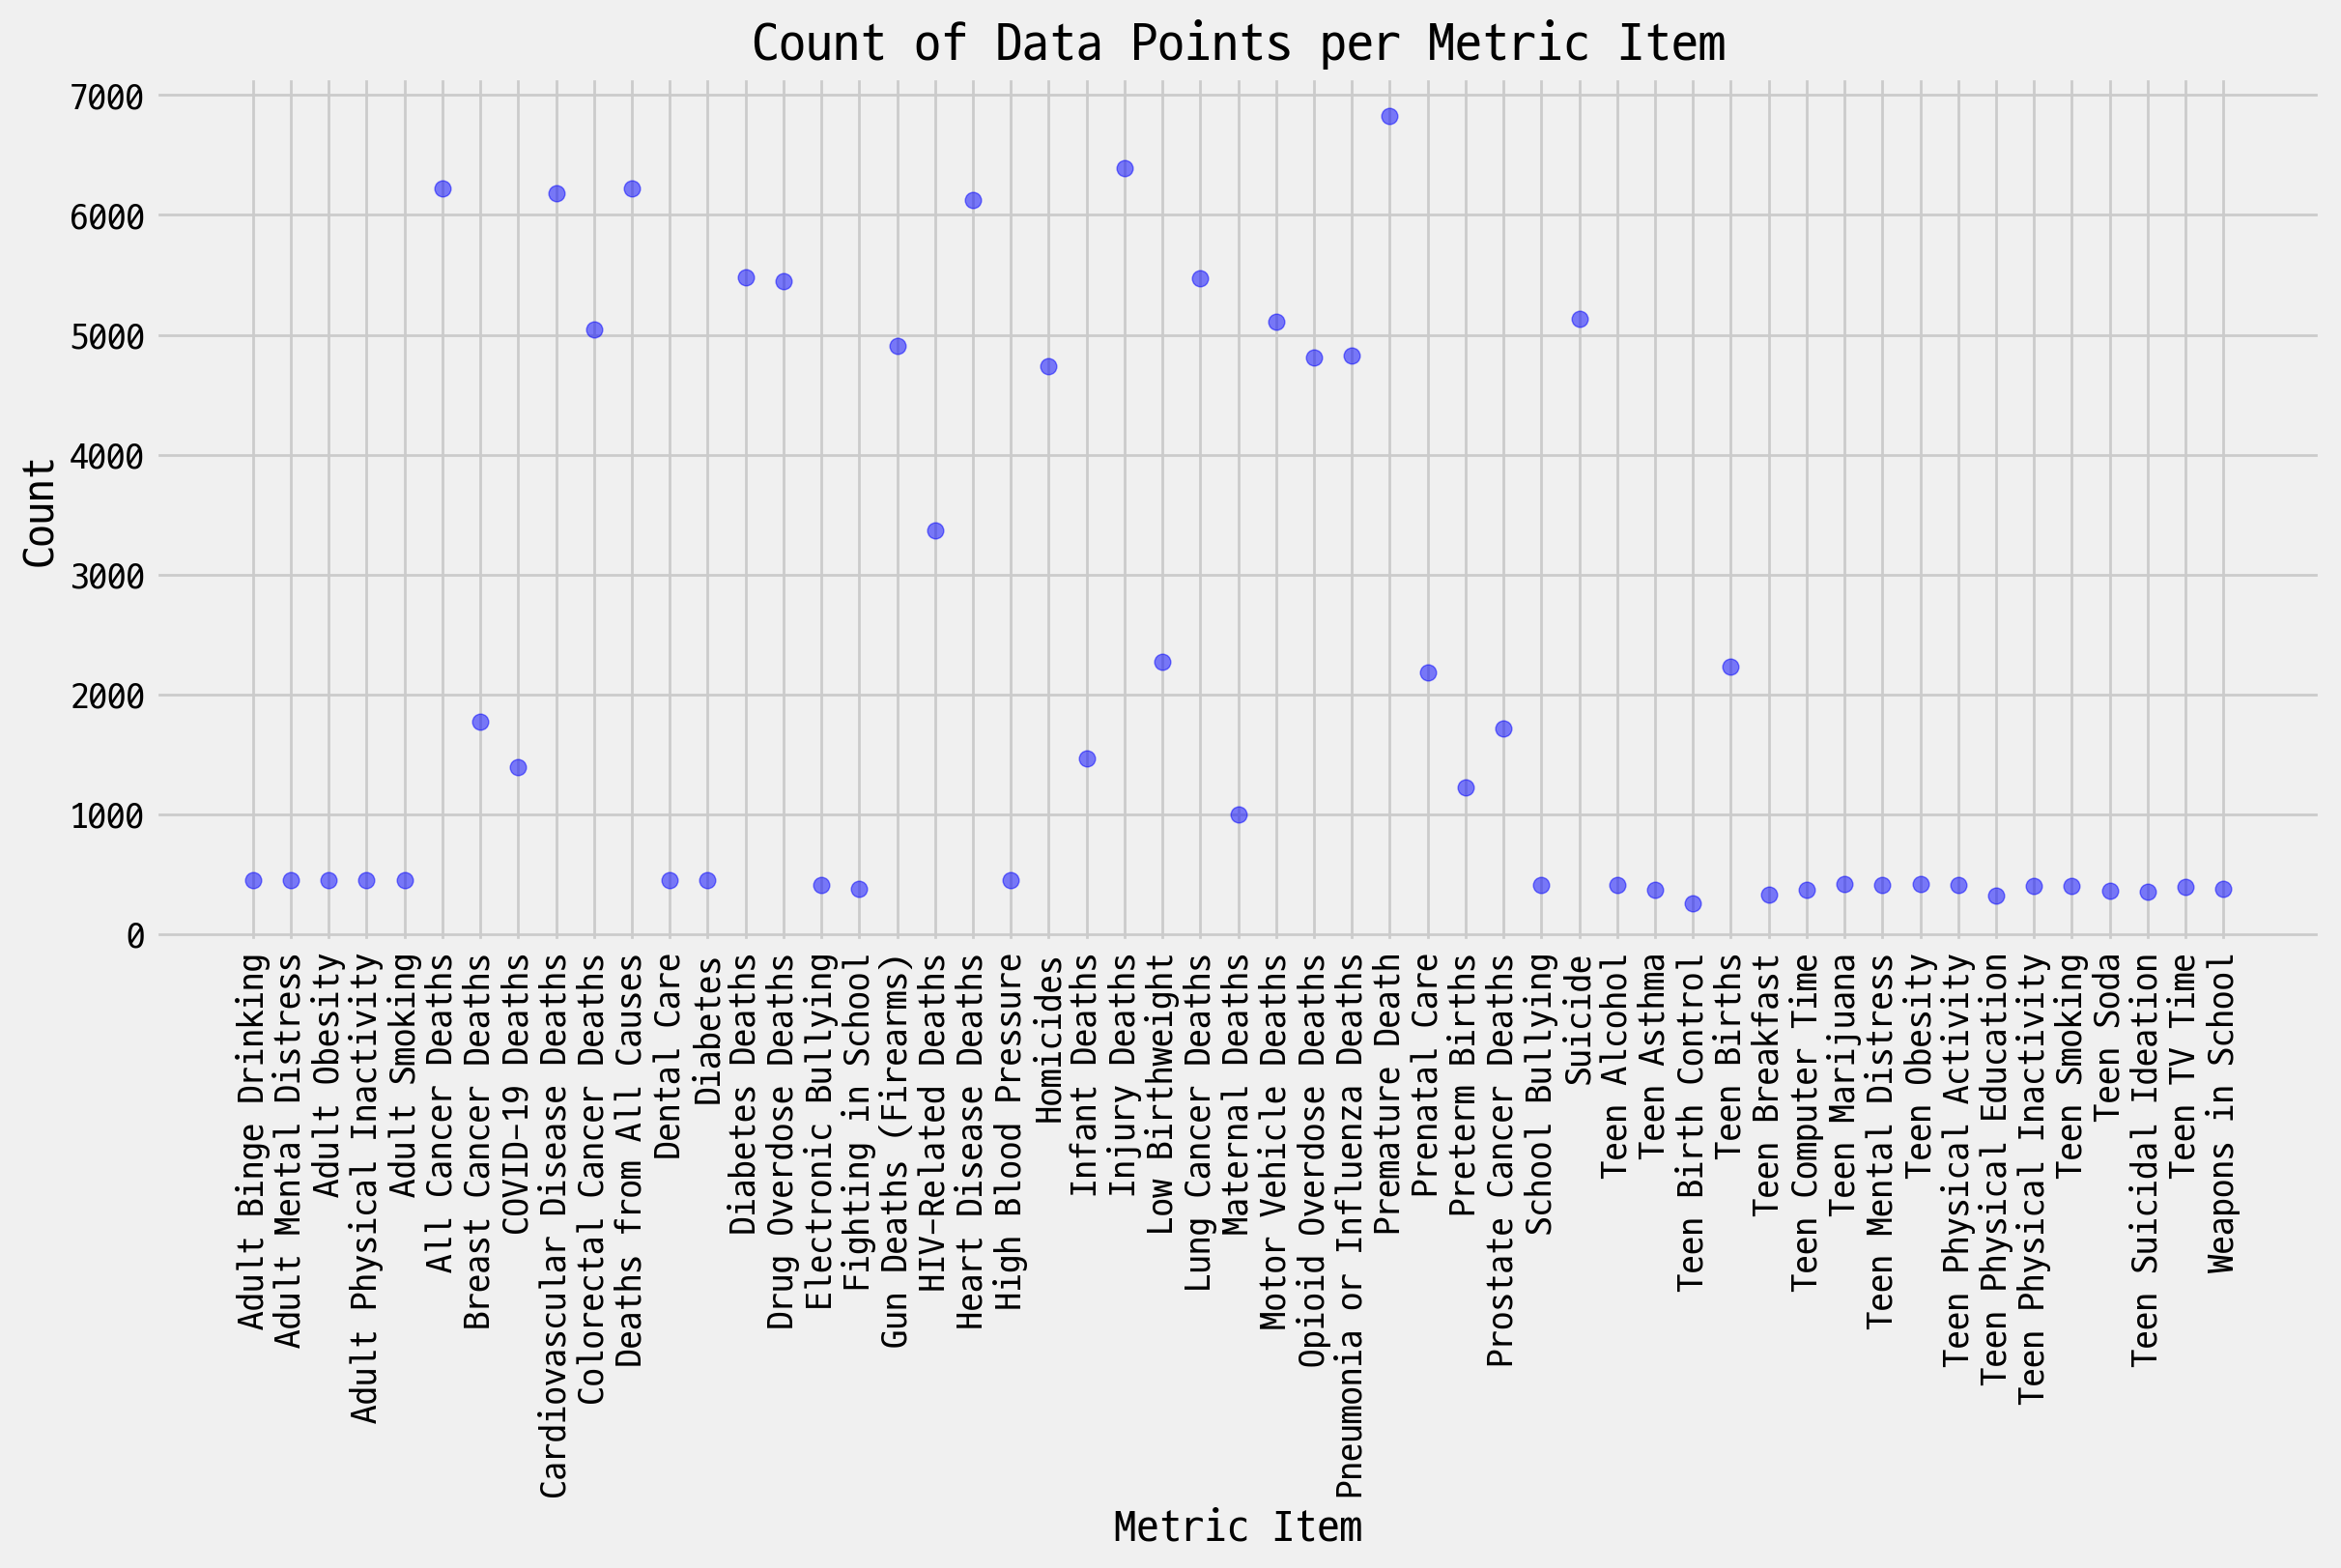

In [31]:
# 결측치가 60% 이상인 컬럼을 제거
threshold = 0.6
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# 데이터프레임의 수치형 컬럼 선택
numerical_columns = df_cleaned.select_dtypes(include='number').columns

# 결측치가 있는 행을 삭제
df_cleaned = df_cleaned.dropna(subset=numerical_columns)

# 'metric_item_label' 컬럼을 기준으로 데이터를 정렬하고 그룹화
sorted_data_by_metric = df_cleaned.sort_values(by='metric_item_label')
grouped_data_by_metric = sorted_data_by_metric.groupby('metric_item_label')

# 각 그룹의 데이터 포인트 수 계산
counts = grouped_data_by_metric.size()

# 데이터 포인트 수를 산점도로 시각화
plt.figure(figsize=(12, 8))
plt.scatter(counts.index, counts.values, alpha=0.5, color='blue')
plt.xlabel('Metric Item')
plt.ylabel('Count')
plt.title('Count of Data Points per Metric Item')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

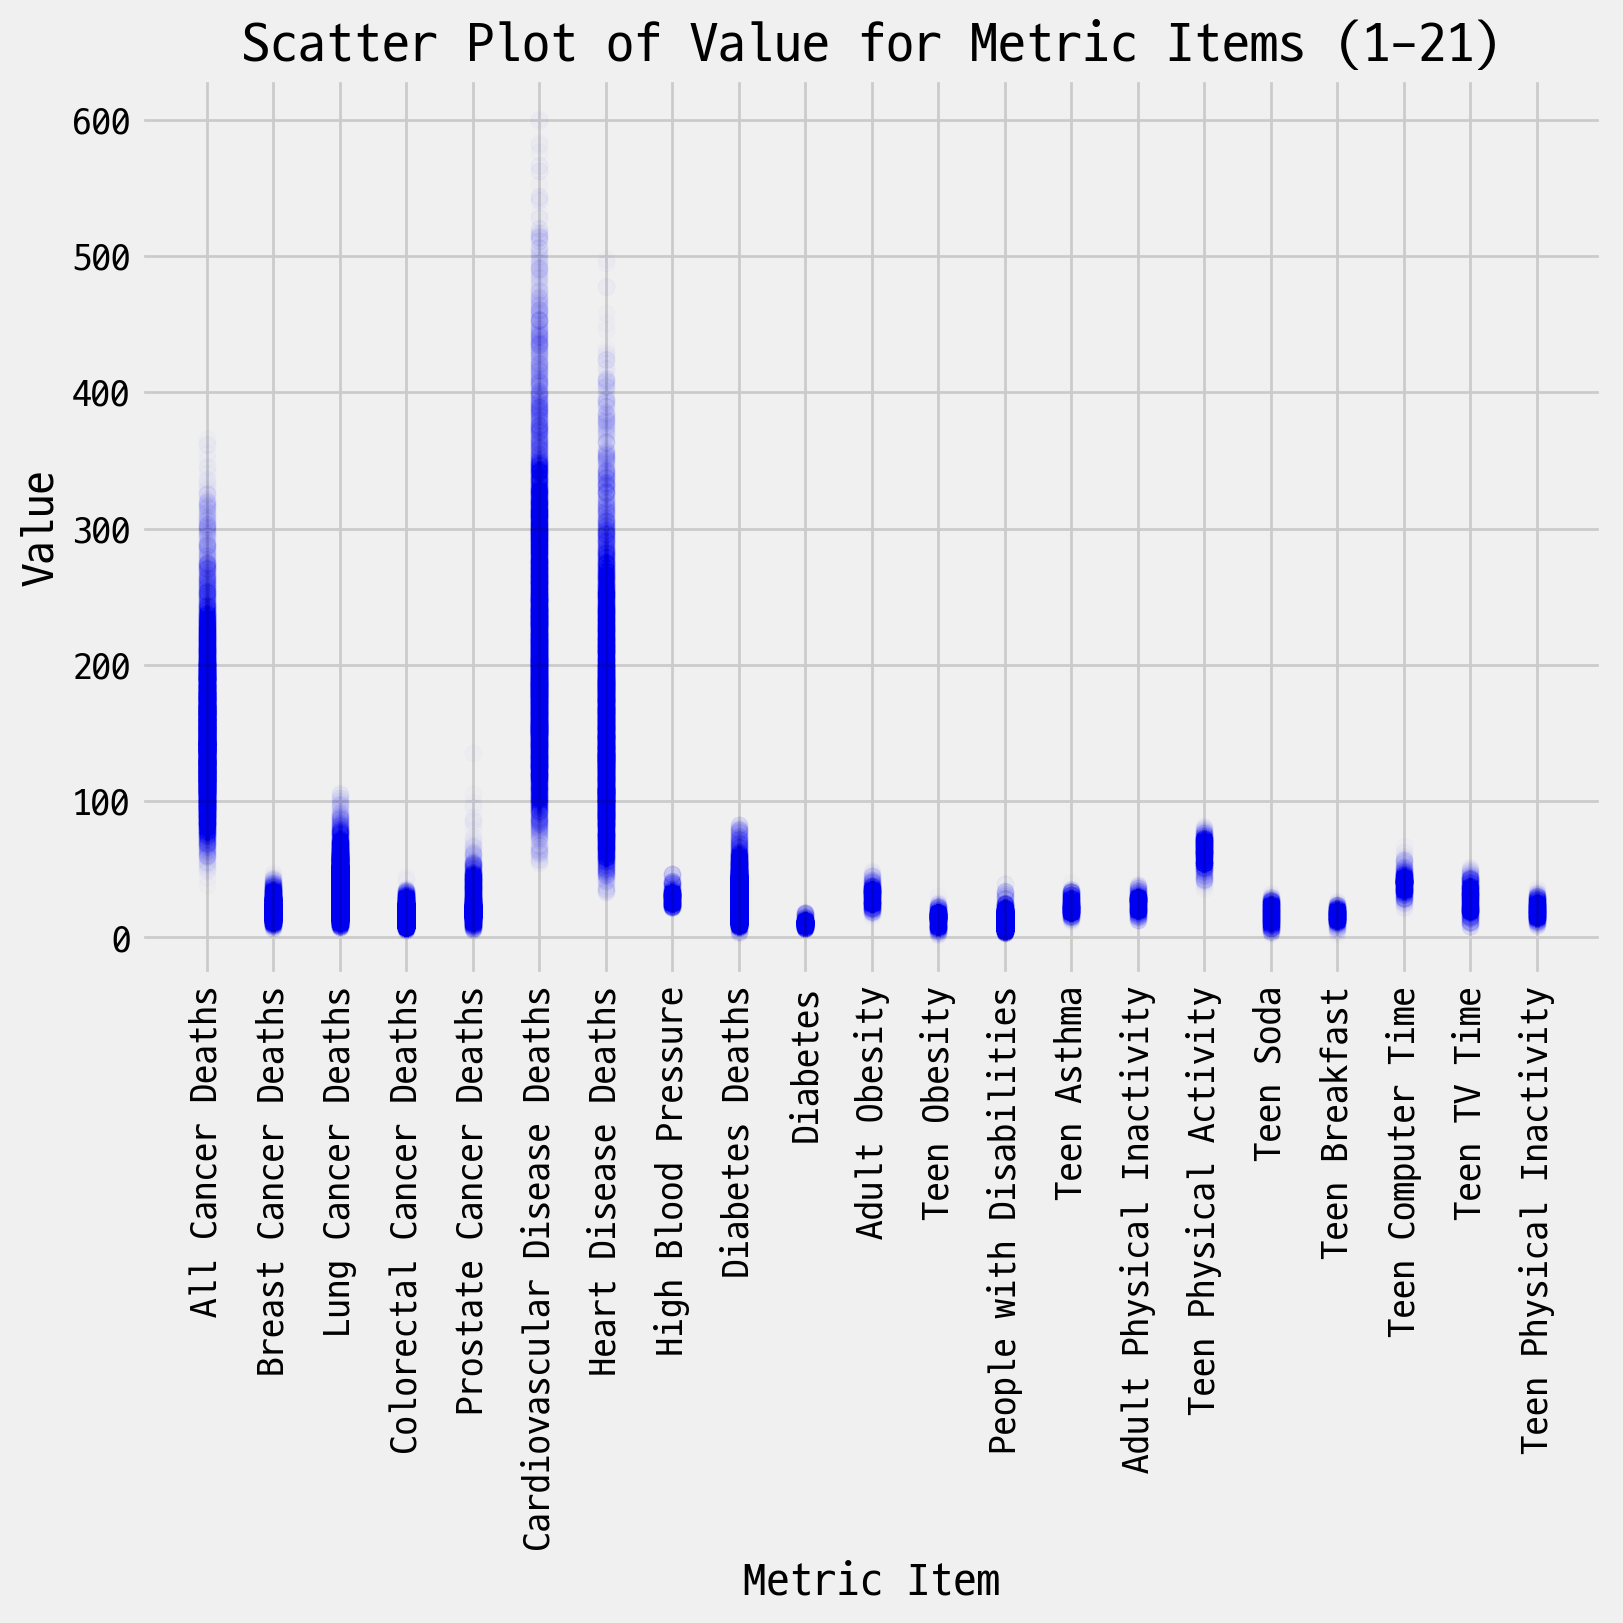

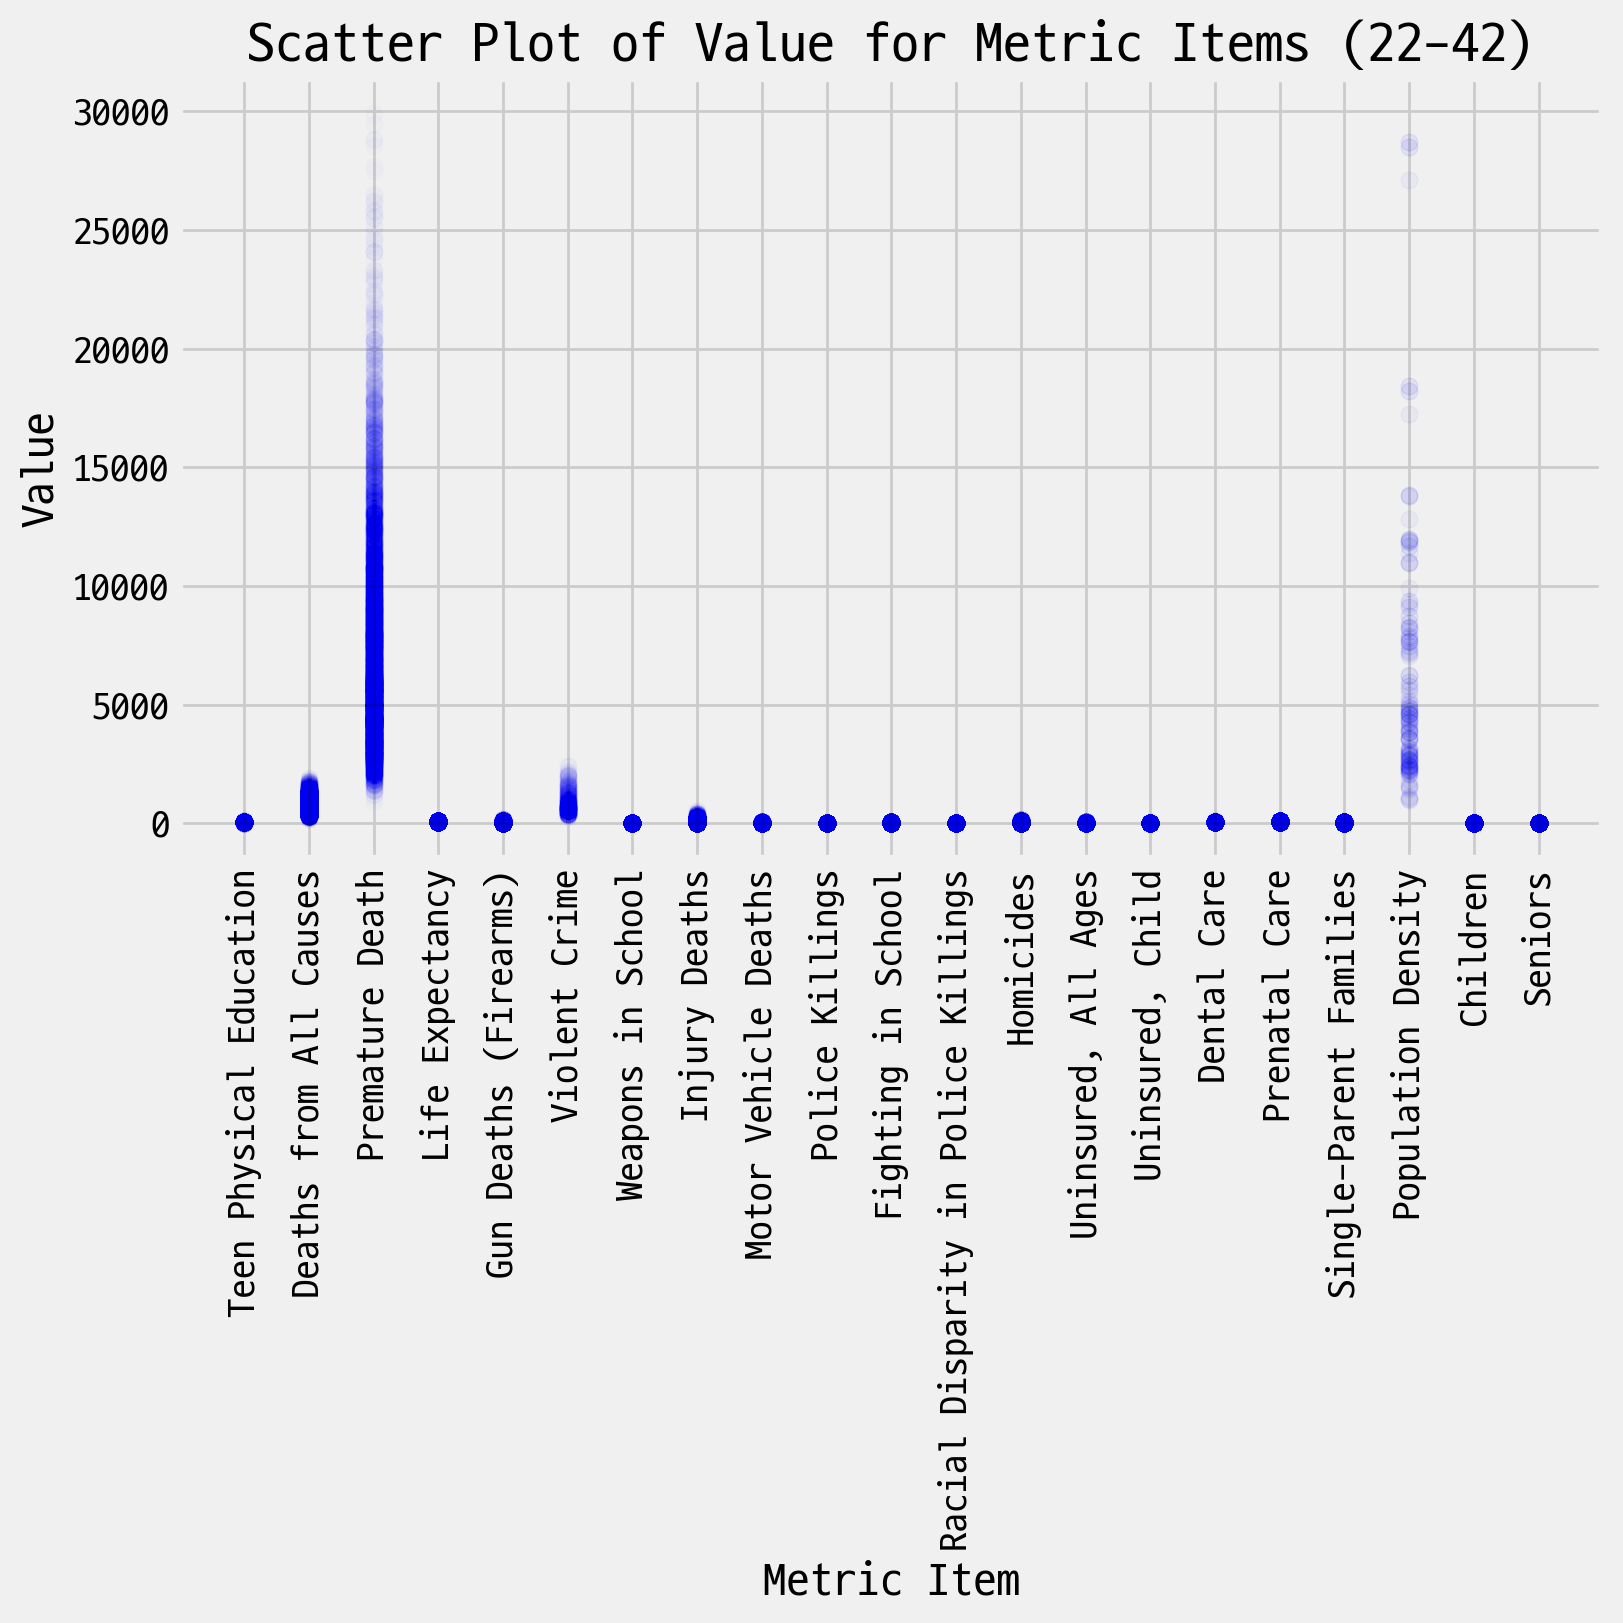

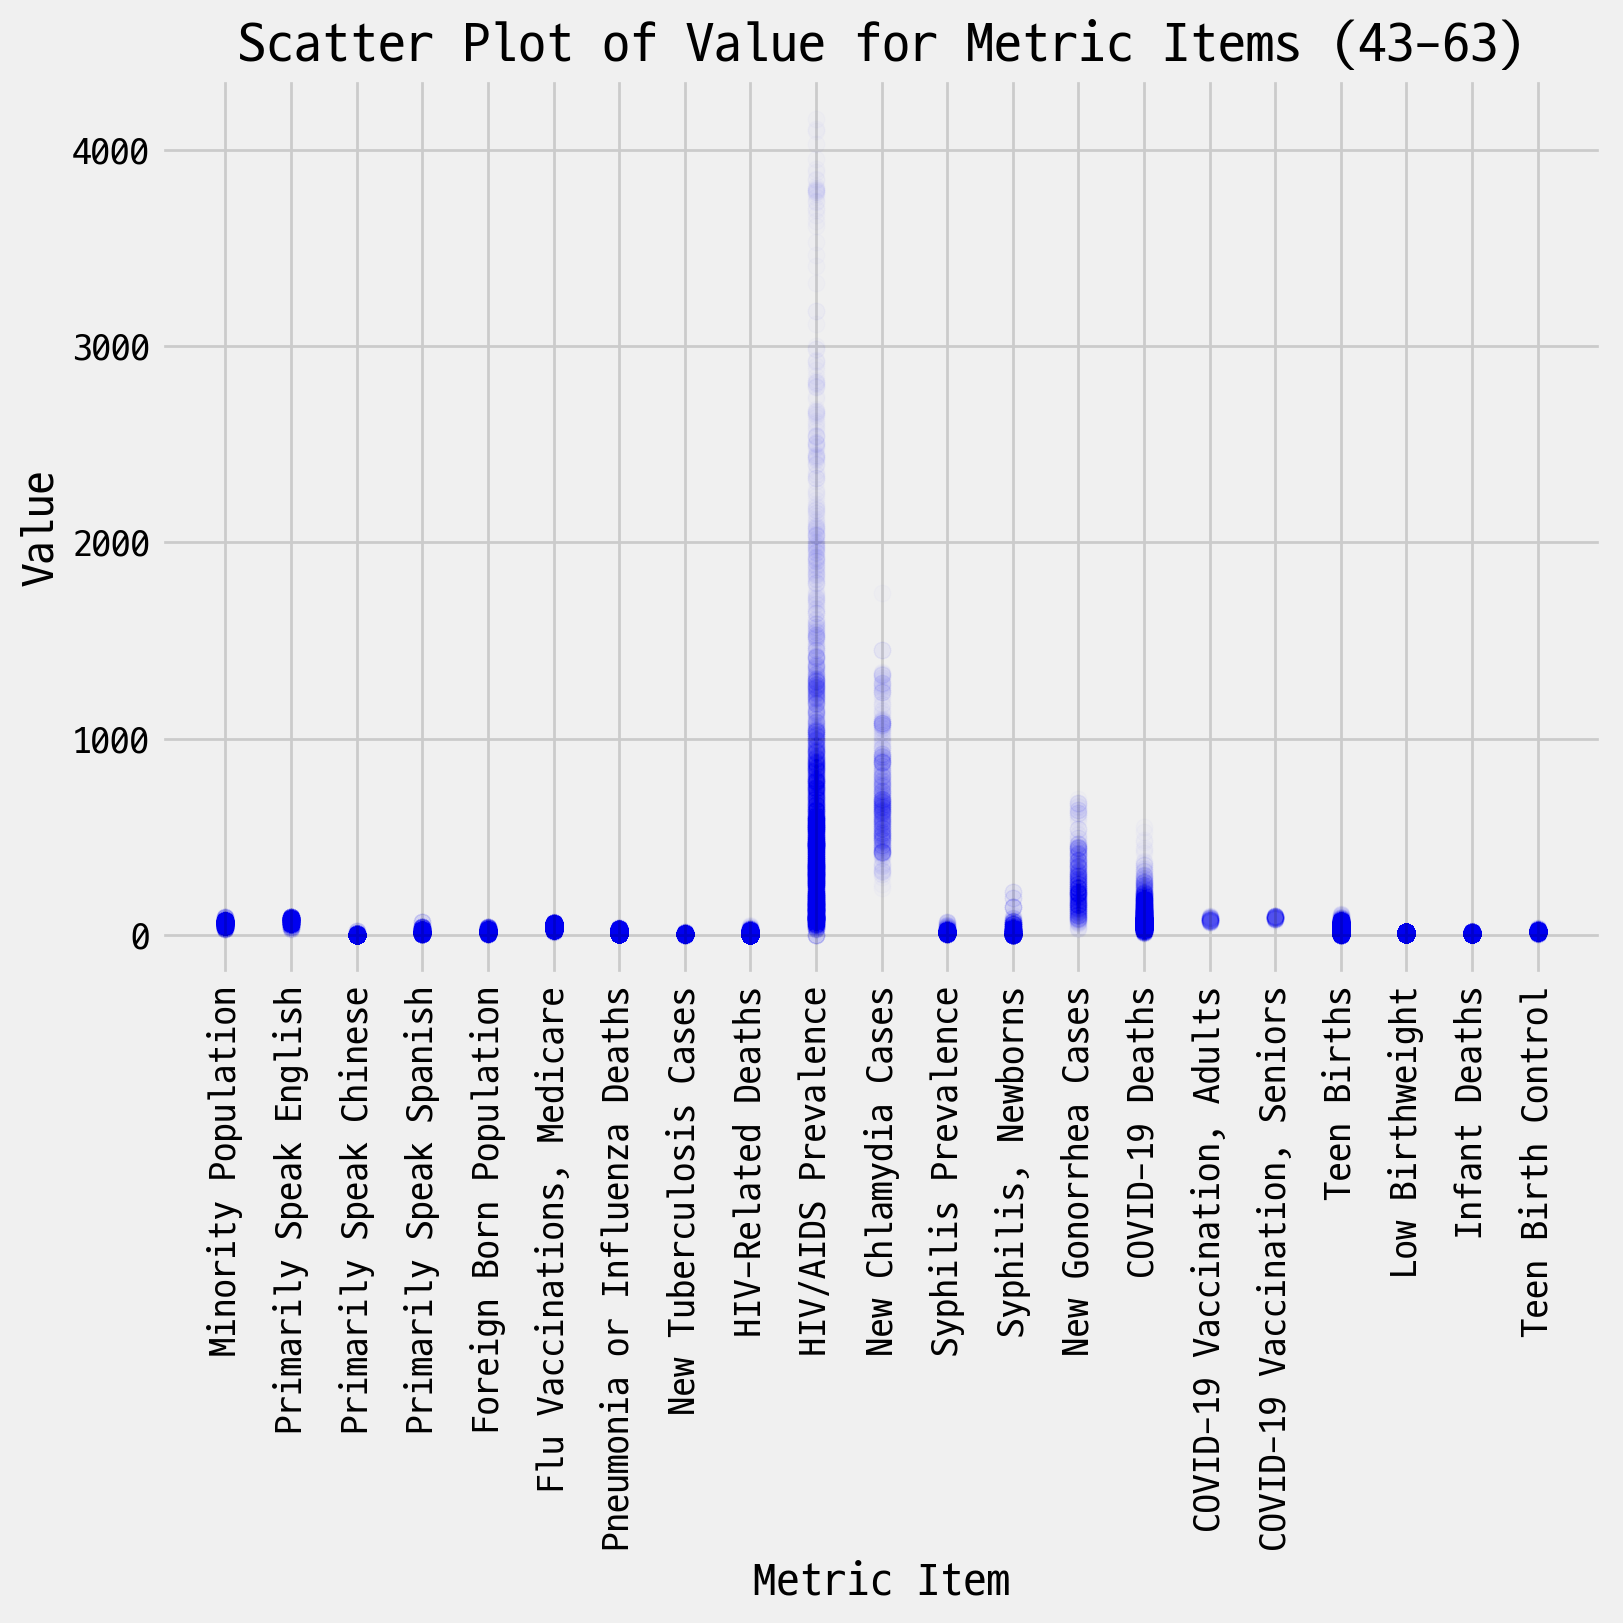

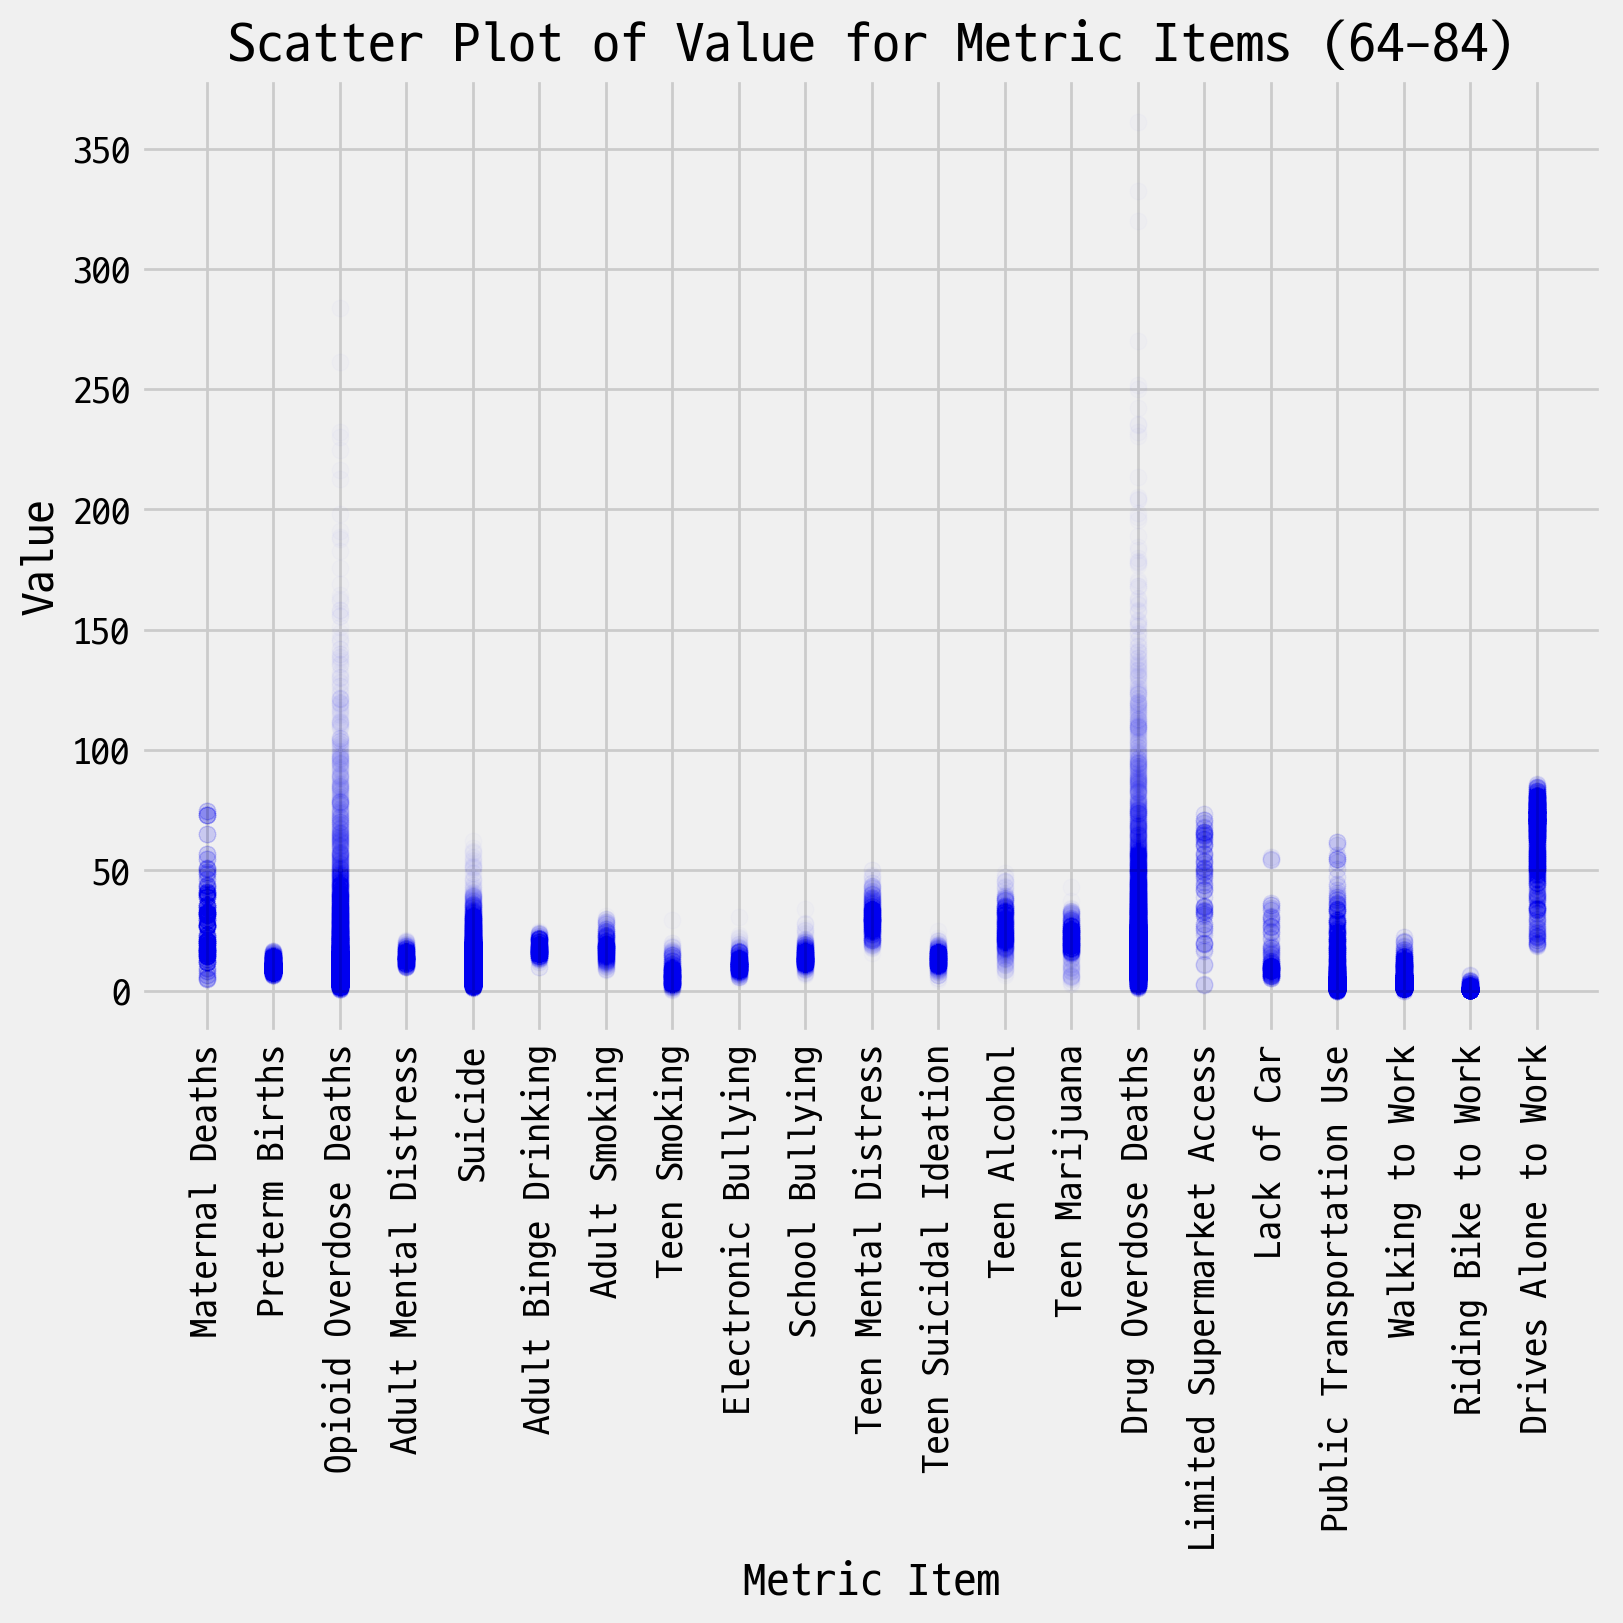

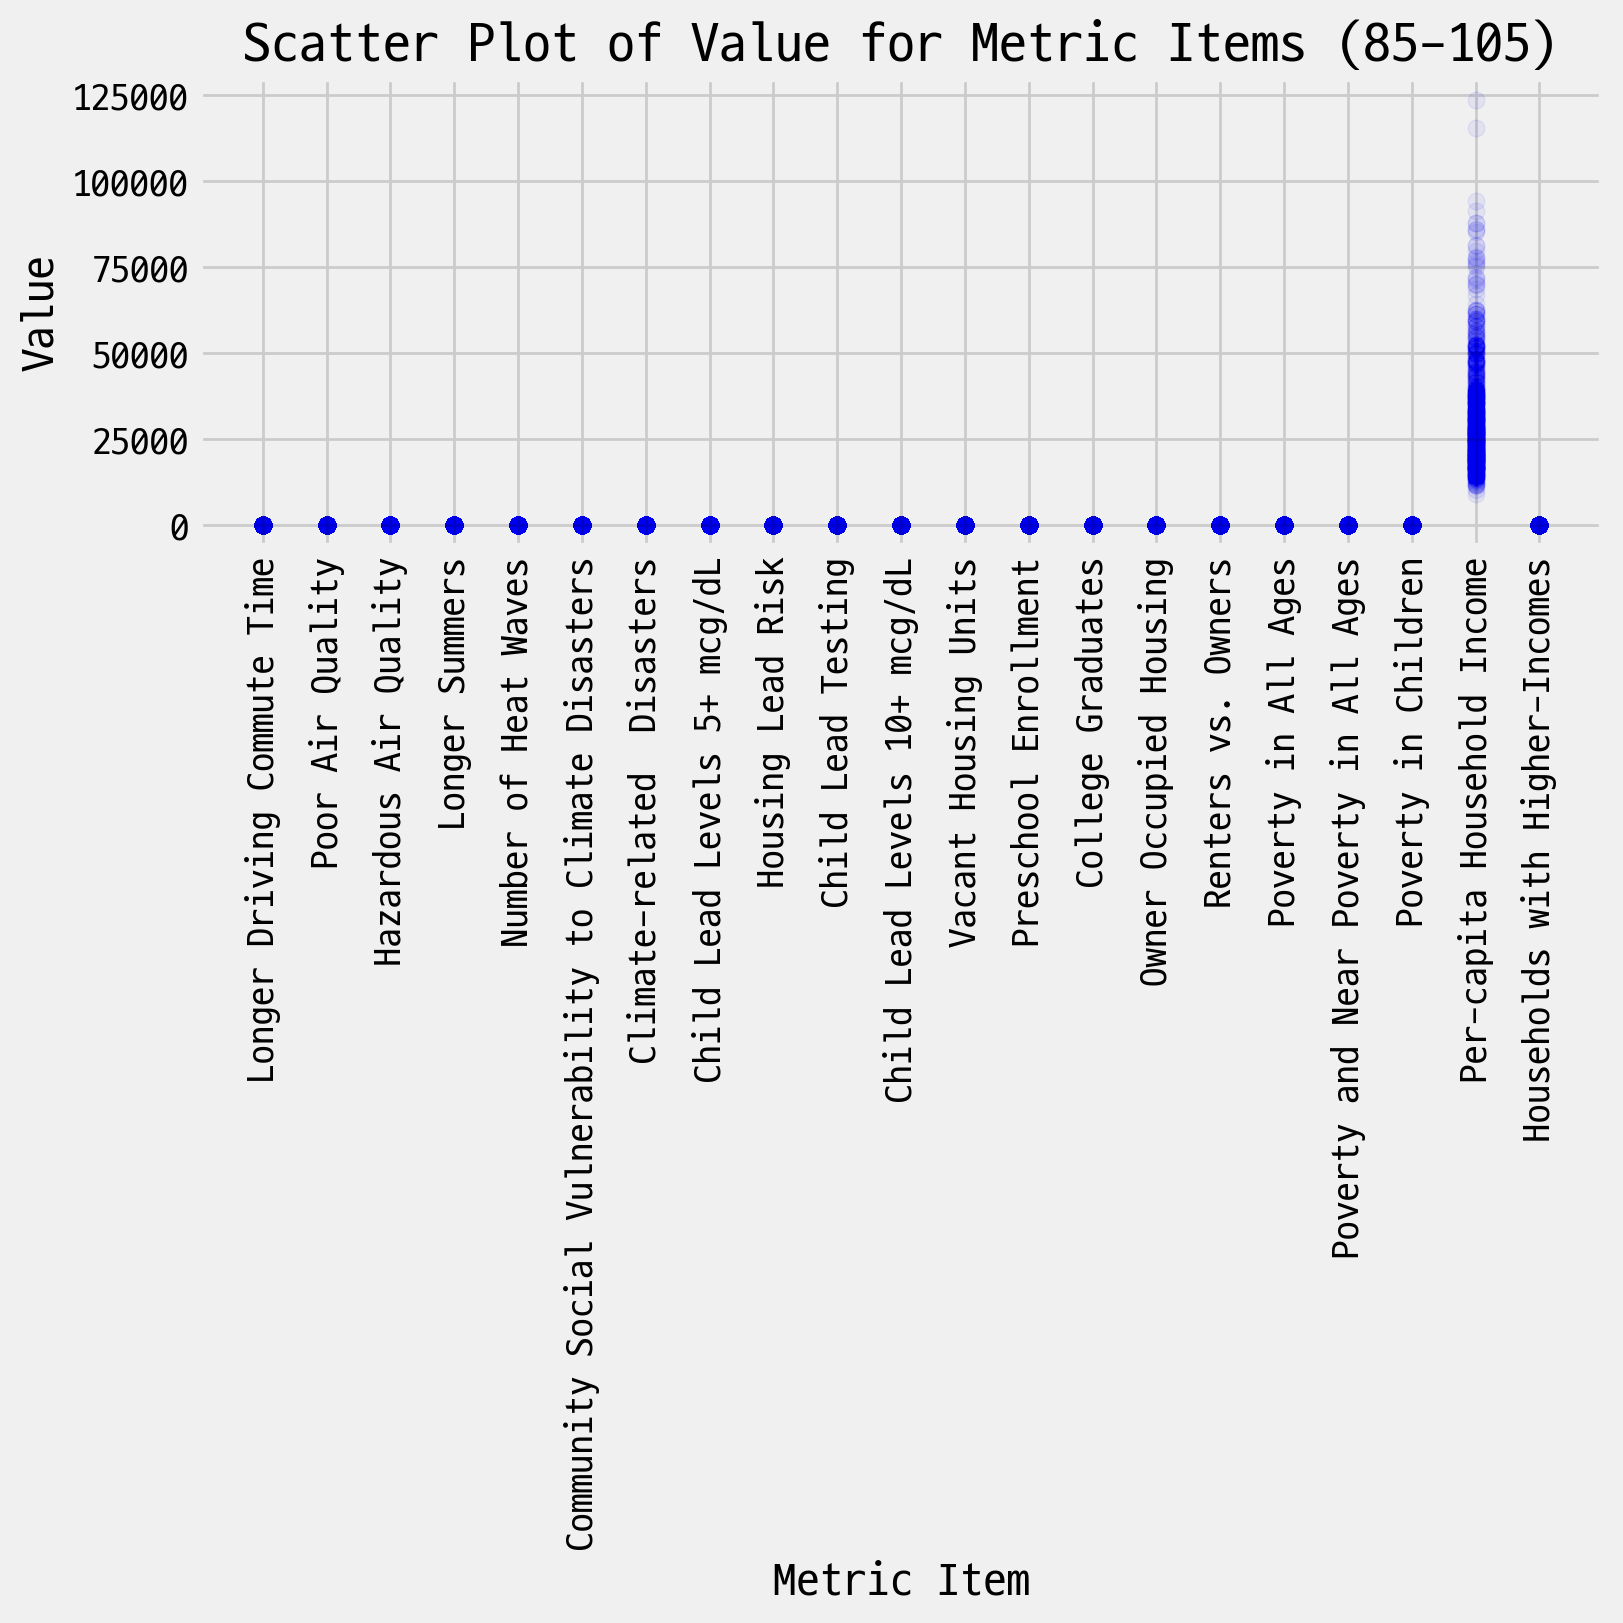

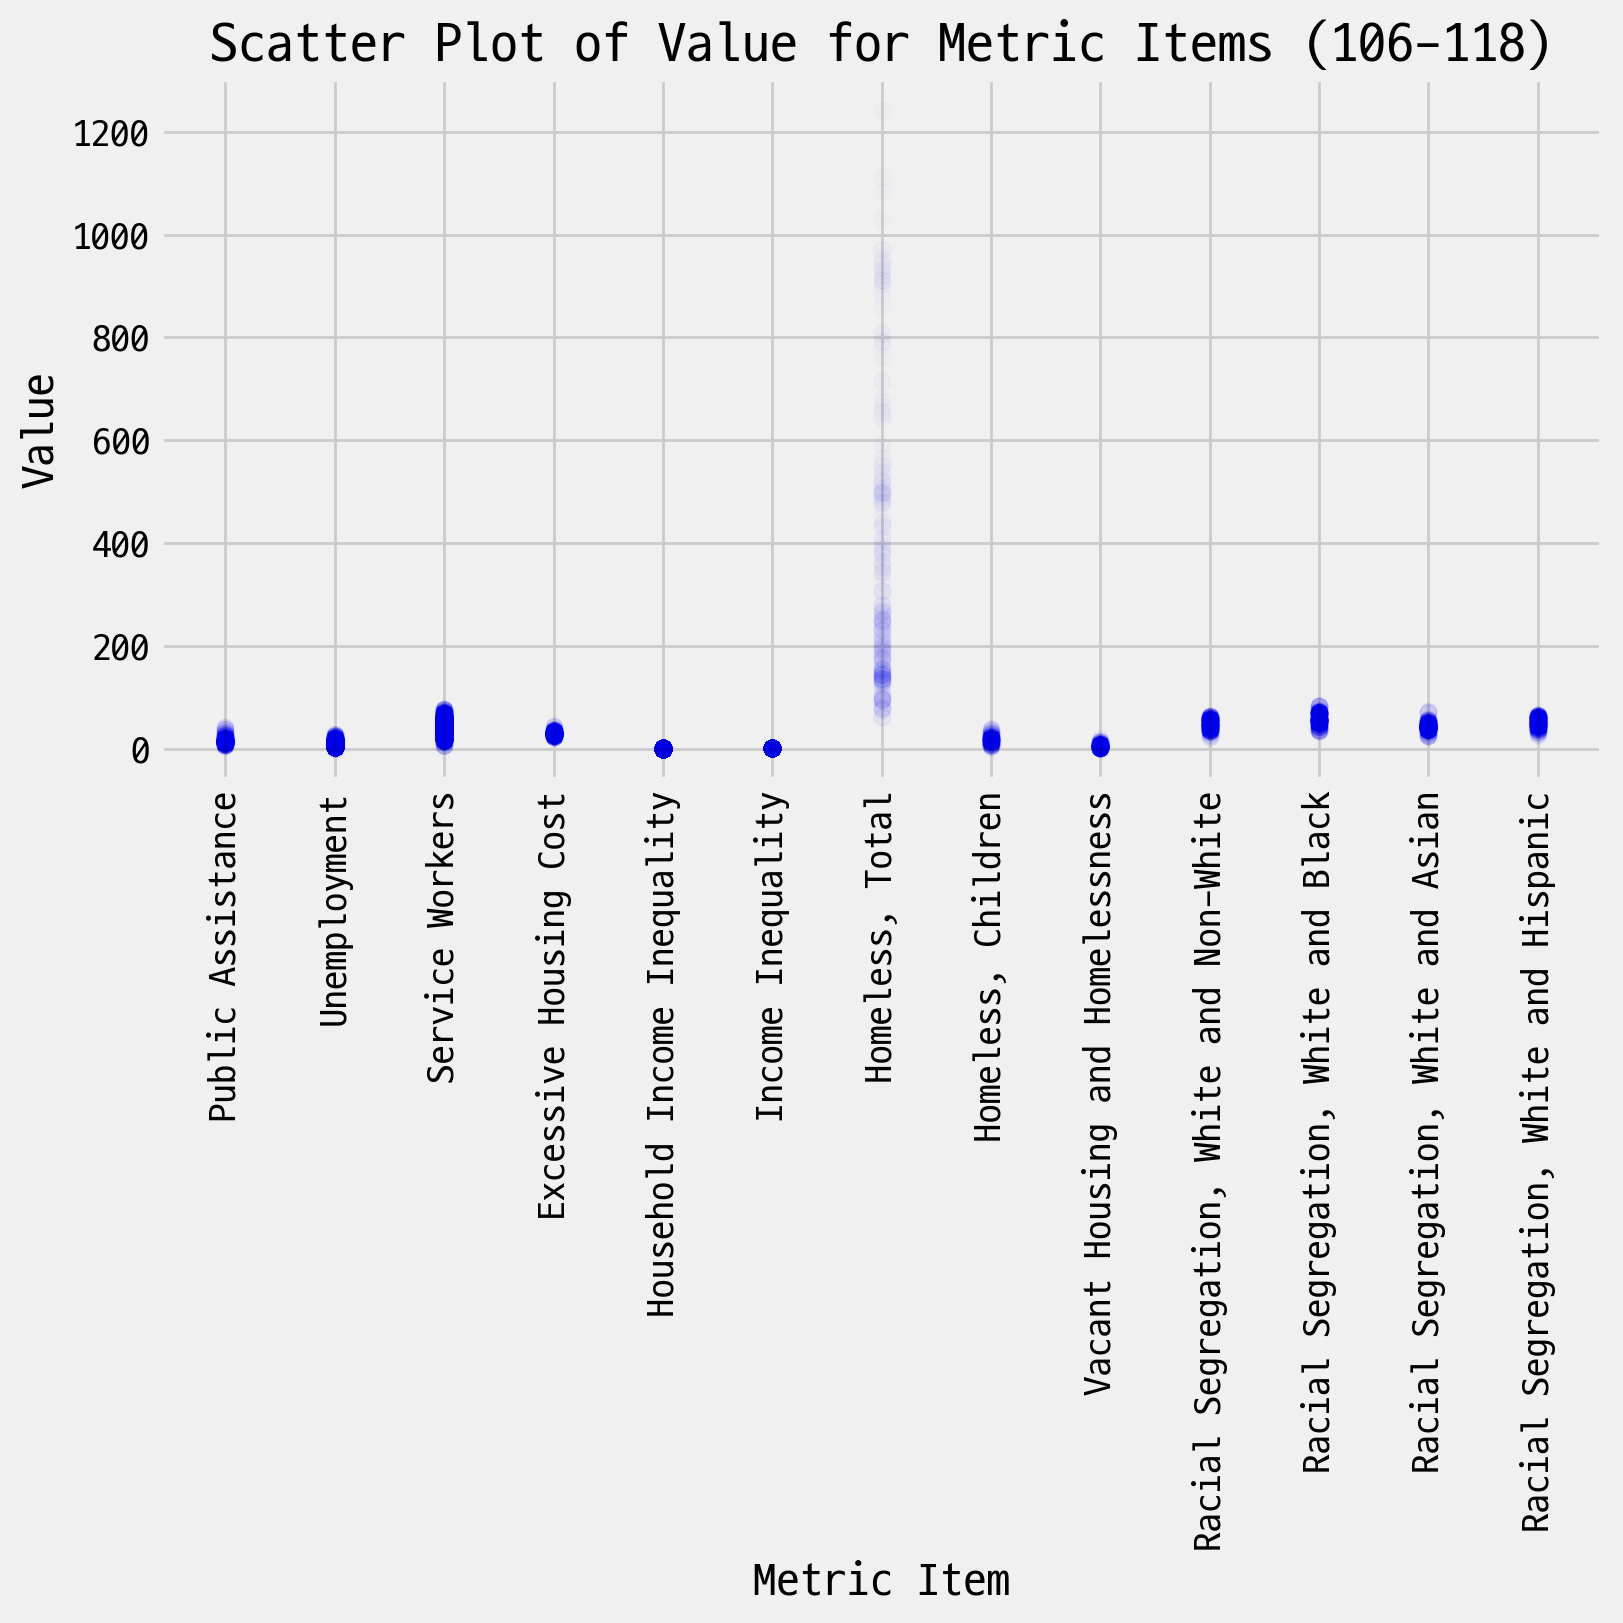

In [39]:
# 결측치가 60% 이상인 컬럼을 제거
threshold = 0.6
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# 데이터프레임의 수치형 컬럼 선택
numerical_columns = df_cleaned.select_dtypes(include='number').columns

# 결측치가 있는 행을 삭제
#df_cleaned = df_cleaned.dropna(subset=[value_column])

# metric_item_label의 고유한 값들
unique_metric_items = df_cleaned['metric_item_label'].unique()

# 고유한 값들을 21개씩 끊어서 시각화
for i in range(0, len(unique_metric_items), 21):
    chunk = unique_metric_items[i:i+21]
    chunk_data = df_cleaned[df_cleaned['metric_item_label'].isin(chunk)]
    
    plt.figure(figsize=(8, 8))
    plt.scatter(chunk_data['metric_item_label'], chunk_data['value'], alpha=0.01, color='blue')
    plt.xlabel('Metric Item')
    plt.ylabel('Value')
    plt.title(f'Scatter Plot of Value for Metric Items ({i+1}-{min(i+21, len(unique_metric_items))})')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()